# Project Aim
In this project, one of the focal points of analysis that holds paramount importance to me is the distinction between high-risk and low-risk areas for residential living. To thoroughly investigate this aspect, I have extensively utilized various data visualizations, including plots and maps, as key tools for in-depth analysis.
Project Aim
The primary objective of this project encompasses four distinct sections, each designed to contribute significantly to our understanding of crime dynamics:

Section 1: Comprehensive Data Analysis
In this initial phase, the project seeks to conduct a thorough examination of the dataset's various columns, with a specific focus on identifying the most and least prevalent types of crimes. This analysis will be accompanied by compelling visualizations to facilitate a clear comprehension of the data's inherent patterns and trends.

Section 2: In-Depth Data Exploration and Comparative Analysis
Building upon the foundational insights from Section 1, this segment involves a meticulous exploration of the dataset's attributes. Through an intricate examination of each column and their interrelationships, we aim to uncover hidden insights and discern intricate connections within the data.

Section 3: Detailed Crime Type Analysis Using TF-IDF
This section takes a specialized approach by employing TF-IDF (Term Frequency-Inverse Document Frequency) to conduct a granular analysis of crime types. By harnessing this technique, we delve into the most distinctive terms within crime descriptions, enriching our understanding of specific crime patterns. Visualizations will complement this analysis, rendering the findings more accessible.

Section 4: Development of Predictive Models
The final section of the project endeavors to harness the power of predictive modeling. By leveraging various data sources, we aim to construct predictive models capable of forecasting and anticipating crime trends. These models will serve as valuable tools for law enforcement agencies, policymakers, and the community at large, enabling proactive measures to enhance safety and security.

In essence, this multifaceted project seeks to unravel the complex tapestry of crime in its various dimensions. Through rigorous data analysis, comparative exploration, specialized crime type examination, and predictive modeling, our ultimate goal is to empower stakeholders with actionable insights and strategies for a safer and more secure community.

# RESOURSE
The orginal datasets taken from the Kaggle

https://www.kaggle.com/datasets/sohier/crime-in-baltimore/data

https://www.kaggle.com/datasets/cityofLA/crime-in-los-angeles/data

In this project, I employed a relatively limited dataset, focusing solely on data from the year 2020 for analysis.


# Abstract of Dataset Information 

#### The 2020 Los Angeles crime dataset provides a rich and diverse array of information, offering valuable insights into the dynamics of crime in the city. While most columns in the dataset are complete, there are gaps in 'Vict Sex' and 'Premis Desc,' which should be considered in any analyses involving these specific fields.
Here is an overview of the key columns in the dataset:
DATE OCC: This column records the date on which each crime occurred.
TIME OCC: It captures the time of day when crimes typically took place, with an average occurrence around 1:55 PM, though this varies widely.
AREA and AREA NAME: These columns serve as identifiers for different geographical areas within Los Angeles, encompassing a broad spectrum of regions and reporting districts.
Crm Cd and Crm Cd Desc: These fields categorize the nature of the crimes, covering a wide range of crime types.
Vict Age: This column indicates the age of the crime victims, with a median age of 30 years. However, it's worth noting that the data includes outliers, such as negative ages and ages exceeding 99 years, which may require further scrutiny.
Premis Cd and Premis Desc: These columns describe the locations where crimes occurred, showcasing a significant variance, indicating diverse crime premises.
LOCATION, LAT, and LON: These columns provide the geographical coordinates of crime incidents. While most entries fall within expected ranges for Los Angeles, there are some outliers that may result from data inaccuracies.
By visualizing this dataset on a scatter plot, several key insights emerge:
High-Incidence Zones: The Central, Southwest, and Harbor areas stand out as regions with the highest crime rates, as evidenced by 6334, 5855, and 5587 incidents, respectively. These findings align with the dense clusters observed on the map.
Crime Dispersion: The visualization highlights additional high-crime areas in Hollywood and West LA, suggesting concentrated crime patterns. The presence of red dots across the city indicates that crime is pervasive, with distinct hotspots.
Areas with Fewer Crimes: Conversely, locations such as Pacific and N Hollywood exhibit lower crime rates, potentially indicating less densely populated or more residential settings.
Spatial Correlation: Overlaying crime incident numbers onto the map underscores the link between crime rates and urban density, offering valuable insights into the city's spatial dynamics.
Focused Intervention: These findings point to specific zones that may benefit from intensified crime prevention efforts, targeting resources more effectively.
Variance in Crime Density: While some locales show a high density of crime incidents, others have sparse distributions, possibly indicating isolated events or unique local conditions that influence crime occurrences.
Overall, this synthesized dataset, when combined with regional crime statistics and visualizations, provides a powerful tool for understanding the prevalence and distribution of crime in Los Angeles. It equips decision-makers and law enforcement agencies with the necessary information to allocate resources strategically and formulate targeted crime prevention strategies that align with the city's unique geographical and demographic characteristics.

# RESULT AND Report
The outcome of each code execution and corresponding plot has been meticulously analyzed and documented in the form of a comprehensive report. To gain a thorough understanding, please refer to the report located at the end of each code section.


## Data Analysis and Visualization Setup

This script sets up the necessary Python libraries for data analysis, visualization, 
and machine learning tasks. It includes libraries for data manipulation (Pandas, NumPy), 
visualization (Seaborn, Matplotlib, Folium), text processing (NLTK, TfidfVectorizer), 
and clustering algorithms (KMeans, PCA) from scikit-learn. 
The setup configures Seaborn for enhanced graphical representation and checks for the 
availability of NLTK's stopwords to support text analysis operations.
### use GPU to run code
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import re
import nltk
from nltk.corpus import stopwords

# Set the style and font size for Seaborn plots
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 16})

# Ensuring that NLTK stopwords are downloaded
nltk.download('stopwords')
!pip install wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Behnam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading Dataset 

In [2]:
# Data Loading
file_path = 'LA_crime.csv'
data = pd.read_csv(file_path)
data

DATE OCC  TIME OCC  AREA    AREA NAME  Rpt Dist No  \
0            01/08/2020 00:00      2230     3    Southwest          377   
1            01/01/2020 00:00       330     1      Central          163   
2      02/13/2020 12:00:00 AM      1200     1      Central          155   
3            01/01/2020 00:00      1730    15  N Hollywood         1543   
4            01/01/2020 00:00       415    19      Mission         1998   
...                       ...       ...   ...          ...          ...   
59994  06/25/2020 12:00:00 AM      1600     2      Rampart          217   
59995  07/19/2020 12:00:00 AM      2200     5       Harbor          524   
59996        07/05/2020 00:00      1730     1      Central          128   
59997        10/09/2020 00:00       415     1      Central          155   
59998  05/23/2020 12:00:00 AM      1630    10  West Valley         1018   

       Crm Cd                                        Crm Cd Desc  Vict Age  \
0         624                           BATTERY - SIMPLE ASSAULT        36   
1         624                           BATTERY - SIMPLE ASSAULT        25   
2         845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE         0   
3         745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76   
4         740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31   
...       ...                                                ...       ...   
59994     510                                   VEHICLE - STOLEN         0   
59995     210                                            ROBBERY        43   
59996     745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        39   
59997     230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        33   
59998     624                           BATTERY - SIMPLE ASSAULT        31   

      Vict Sex  Premis Cd                                   Premis Desc  \
0            F      501.0                        SINGLE FAMILY DWELLING   
1            M      102.0                                      SIDEWALK   
2            X      726.0                               POLICE FACILITY   
3            F      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
4            X      409.0                           BEAUTY SUPPLY STORE   
...        ...        ...                                           ...   
59994      NaN      707.0                                GARAGE/CARPORT   
59995        M      101.0                                        STREET   
59996        F      122.0                      VEHICLE, PASSENGER/TRUCK   
59997        F      102.0                                      SIDEWALK   
59998        F      707.0                                GARAGE/CARPORT   

                                       LOCATION      LAT       LON  
0       1100 W  39TH                         PL  34.0141 -118.2978  
1        700 S  HILL                         ST  34.0459 -118.2545  
2        200 E  6TH                          ST  34.0448 -118.2474  
3       5400    CORTEEN                      PL  34.1685 -118.4019  
4      14400    TITUS                        ST  34.2198 -118.4468  
...                                         ...      ...       ...  
59994    400 N  ALVARADO                     ST  34.0703 -118.2680  
59995           ANAHEIM                      ST  33.7791 -118.2795  
59996           2ND                          ST  34.0493 -118.2417  
59997                                       5TH  34.0448 -118.2474  
59998   7500    HASKELL                      AV  34.2074 -118.4794  

[59999 rows x 14 columns]

## Data Cleaning


In [3]:
data["AREA NAME"].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire',
       'Northeast', 'Harbor', 'Van Nuys', 'West Valley', 'West LA',
       'Wilshire', 'Pacific', 'Rampart', '77th Street', 'Hollenbeck',
       'Southeast', 'Hollywood', 'Newton', 'Topanga', 'Foothill',
       'Olympic'], dtype=object)

In [4]:
data["Vict Sex"].unique()

array(['F', 'M', 'X', nan, 'H'], dtype=object)

In [5]:
# Get a concise summary of the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE OCC     59999 non-null  object 
 1   TIME OCC     59999 non-null  int64  
 2   AREA         59999 non-null  int64  
 3   AREA NAME    59999 non-null  object 
 4   Rpt Dist No  59999 non-null  int64  
 5   Crm Cd       59999 non-null  int64  
 6   Crm Cd Desc  59999 non-null  object 
 7   Vict Age     59999 non-null  int64  
 8   Vict Sex     51958 non-null  object 
 9   Premis Cd    59998 non-null  float64
 10  Premis Desc  59983 non-null  object 
 11  LOCATION     59999 non-null  object 
 12  LAT          59999 non-null  float64
 13  LON          59999 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 6.4+ MB
None


###### The output from the .info() method on your dataset provides a summary of the DataFrame structure, which includes the following information:
DataFrame Size:
The DataFrame has 59,999 entries, indexed from 0 to 59,998, meaning there are 59,999 rows in the dataset.
Columns:
There are a total of 14 columns in the DataFrame, each with a column name and data type.

Data Types:
object: The columns DATE OCC, AREA NAME, Crm Cd Desc, Vict Sex, Premis Desc, and LOCATION are of object type, which usually means they contain text strings or mixed types (text and numeric).
int64: The columns TIME OCC, AREA, Rpt Dist No, Crm Cd, and Vict Age are of integer data type, indicating they contain numerical values without decimal points.
float64: The columns Premis Cd, LAT, and LON are of float data type, which means they contain numerical values with decimal points.

Memory Usage:
The DataFrame is using approximately 6.4 MB of memory.

In [6]:
# Get statistical summary for numerical attributes
print(data.describe())

           TIME OCC          AREA   Rpt Dist No        Crm Cd      Vict Age  \
count  59999.000000  59999.000000  59999.000000  59999.000000  59999.000000   
mean    1355.539226      6.556359    701.148819    500.629510     29.943116   
std      649.624658      4.229974    422.193661    205.951536     21.877580   
min        1.000000      1.000000    101.000000    110.000000     -2.000000   
25%      925.000000      3.000000    373.000000    331.000000      7.000000   
50%     1440.000000      6.000000    647.000000    442.000000     31.000000   
75%     1900.000000      9.000000    946.000000    626.000000     46.000000   
max     2359.000000     21.000000   2197.000000    956.000000     99.000000   

          Premis Cd          LAT           LON  
count  59998.000000  59999.00000  59999.000000  
mean     288.005800     33.94747   -117.962143  
std      215.009431      1.91145      6.631856  
min      101.000000      0.00000   -118.661000  
25%      101.000000     34.03390   -118.398

######  The .describe() method furnishes comprehensive statistical insights into the dataset's numerical features, excluding NaN values. These statistics offer a concise summary of central tendencies, variability, and distribution patterns. Here's a breakdown of the results:

TIME OCC (Time of Occurrence): Crimes are reported throughout the day, with occurrence times ranging from 1 to 2359 (in military time). The mean occurrence time is approximately 13:55 (1:55 PM), accompanied by a notable standard deviation of 649.62, suggesting a wide dispersion of incident times throughout the day.

AREA: AREA codes encompass a range from 1 to 21, presumably denoting various precincts or regions within the city of Los Angeles. The mean area code is 6.56, and the standard deviation stands at 4.23, indicating a relatively even distribution of crimes across these distinct areas.

Rpt Dist No (Reporting District Number): These numeric values span from 101 to 2197 and serve as identifiers for reporting districts. The mean reporting district number is 701.15, signaling a concentration toward the lower end of the district number spectrum.

Crm Cd (Crime Code): Crime codes exhibit a range from 110 to 956, serving as identifiers for the type of crime committed. The mean crime code is 500.63, suggesting a fairly balanced utilization of both higher and lower codes.

Vict Age (Victim Age): Victim ages encompass a range from -2 to 99, with an average age of approximately 30 years. The presence of a negative minimum value implies potential data inaccuracies that necessitate cleaning. A standard deviation of 21.88 indicates a considerable spread in victim ages.

Premis Cd (Premise Code): These codes span from 101 to 971 and likely represent the type of location where the crimes occurred. The mean premise code is 288.01, accompanied by a standard deviation of 215.01, hinting at a wide array of crime locations.

Geographical Coordinates (LAT and LON): Latitude ranges between 0 and 34.3271, while longitude spans from -118.661 to 0. Notably, zero values in latitude and longitude likely indicate erroneous or missing data that requires rectification. The mean latitude (33.94747) and longitude (-117.962143) fall within the expected ranges for Los Angeles. However, the large standard deviations, particularly for longitude, are influenced by the presence of zero values.

In [7]:
# Get the first few records to visually inspect the data
print(data.head())

                 DATE OCC  TIME OCC  AREA    AREA NAME  Rpt Dist No  Crm Cd  \
0        01/08/2020 00:00      2230     3    Southwest          377     624   
1        01/01/2020 00:00       330     1      Central          163     624   
2  02/13/2020 12:00:00 AM      1200     1      Central          155     845   
3        01/01/2020 00:00      1730    15  N Hollywood         1543     745   
4        01/01/2020 00:00       415    19      Mission         1998     740   

                                         Crm Cd Desc  Vict Age Vict Sex  \
0                           BATTERY - SIMPLE ASSAULT        36        F   
1                           BATTERY - SIMPLE ASSAULT        25        M   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE         0        X   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   

   Premis Cd                                   Premis Desc  \
0      501.0

### Missing value 

In [8]:
# Calculate the number of missing values for each column
missing_values = data.isnull().sum()
# Display the missing values for each column
print(missing_values)


DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex       8041
Premis Cd         1
Premis Desc      16
LOCATION          0
LAT               0
LON               0
dtype: int64


###### The output of the code indicates the number of missing values in each column of your DataFrame:
DATE OCC, TIME OCC, AREA, AREA NAME, Rpt Dist No, Crm Cd, Crm Cd Desc, Vict Age, LOCATION, LAT, LON:
These columns do not have any missing values (0), which means every row in your dataset has a valid entry for these fields.

Vict Sex: There are 8,041 missing values in this column. This is a substantial number, indicating that a significant portion of the dataset does not have information regarding the victim's sex. 

There is 1 missing value in this column. Since it's just a single missing entry.

Premis Desc: There are 16 missing values in this column.

In [9]:
#Fill Missing Values in 'Vict Sex':
data['Vict Sex'].fillna('Unknown', inplace=True)

#Drop Rows with Missing 'Premis Cd' and 'Premis Desc' Values
data.dropna(subset=['Premis Cd', 'Premis Desc'], inplace=True)

#Verify the Changes
print(data.isnull().sum())


DATE OCC       0
TIME OCC       0
AREA           0
AREA NAME      0
Rpt Dist No    0
Crm Cd         0
Crm Cd Desc    0
Vict Age       0
Vict Sex       0
Premis Cd      0
Premis Desc    0
LOCATION       0
LAT            0
LON            0
dtype: int64


Since 'Vict Sex' has a significant number of missing values (8041), I fill these with a placeholder like 'Unknown'. This keeps the data intact for analysis without introducing bias. Since there's only 1 missing value in 'Premis Cd' and 16 in 'Premis Desc', it's reasonable to remove these rows from the dataset. The impact on the overall dataset will be minimal. 

###  Format Converting

In [10]:
# Convert 'DATE OCC' to datetime format, letting Pandas infer the datetime format
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], infer_datetime_format=True, errors='coerce')
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %H:%M')
print(data.dtypes)

DATE OCC       datetime64[ns]
TIME OCC                int64
AREA                    int64
AREA NAME              object
Rpt Dist No             int64
Crm Cd                  int64
Crm Cd Desc            object
Vict Age                int64
Vict Sex               object
Premis Cd             float64
Premis Desc            object
LOCATION               object
LAT                   float64
LON                   float64
dtype: object


C:\Users\Behnam\AppData\Local\Temp\ipykernel_31492\3384674860.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], infer_datetime_format=True, errors='coerce')


In [11]:
# Convert the time to a string with at least 4 digits (zero-padded on the left)
data['TIME OCC'] = data['TIME OCC'].apply(lambda x: f"{x:04d}")

# Insert a colon to separate hours and minutes
data['TIME OCC'] = data['TIME OCC'].str[:2] + ':' + data['TIME OCC'].str[2:]

# Now the 'TIME OCC' column will have the format 'hh:mm'
print(data['TIME OCC'].head())


0    22:30
1    03:30
2    12:00
3    17:30
4    04:15
Name: TIME OCC, dtype: object


In [12]:
data["Vict Age"].unique()

array([36, 25,  0, 76, 31, 23, 29, 35, 41, 24, 34, 46, 66, 40, 27, 62, 43,
       71, 50, 19, 51, 33, 69, 39, 57, 78, 52, 38, 55, 44, 18, 54, 22, 28,
       42, 56, 67, 37, 60, 61, 59, 32, 30, 45, 20, 15, 58, 47, 48, 26, 21,
       64, 75, 12, 49, 68, 14, 13, 10, 53, 74, 17, 65, 63,  8, 16, 72, 70,
        9, 90, 85, 81, 79, 94, 73, 11, 80,  5, 82,  2, 77, 84, 88, 96, 99,
        7, 86, 92,  3, 83, 87,  6, -1, 89,  4, 93, 98, 91, 95, -2, 97],
      dtype=int64)

In [13]:
# Calculate the median age excluding negative values
median_age = data[data['Vict Age'] > 0]['Vict Age'].median()

# Replace -2 with the median age
data['Vict Age'] = data['Vict Age'].replace(-2, median_age)

# Check the 'Vict Age' column again to ensure -2 values are replaced
print(data['Vict Age'].value_counts())


Vict Age
0     14795
30     1374
19     1347
29     1330
31     1322
      ...  
95        7
96        6
98        5
94        4
97        4
Name: count, Length: 100, dtype: int64


# SECTION 1

### Data understandig of count in each coloums


In [14]:
# To display just the columns of the DataFrame
column_names = data.columns
# Output the column names
print(column_names)


Index(['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')


In [15]:
columns_analysis = {}
for col in data.columns:
    columns_analysis[col] = data[col].value_counts()
    
for col, analysis in columns_analysis.items():
    print(f"Analysis for column: {col}")
    print(analysis.head(100))  # Displaying only the top 10 values for brevity
    print("\n")


Analysis for column: DATE OCC
DATE OCC
2020-01-01    415
2020-06-01    299
2020-03-01    280
2020-02-01    275
2020-03-02    274
             ... 
2020-09-05    119
2020-08-03    119
2020-08-08    115
2020-12-11    113
2020-09-04    113
Name: count, Length: 100, dtype: int64


Analysis for column: TIME OCC
TIME OCC
12:00    2262
18:00    1859
17:00    1762
20:00    1728
19:00    1557
         ... 
21:40     119
18:50     118
10:45     118
11:40     117
09:45     117
Name: count, Length: 100, dtype: int64


Analysis for column: AREA
AREA
1     6334
3     5855
5     5587
6     5316
8     4977
7     4921
2     4873
9     4650
10    4286
4     4209
11    3987
14     790
15     625
12     574
18     541
13     504
20     459
17     410
19     379
21     375
16     331
Name: count, dtype: int64


Analysis for column: AREA NAME
AREA NAME
Central        6334
Southwest      5855
Harbor         5587
Hollywood      5316
West LA        4977
Wilshire       4921
Rampart        4873
Van Nuys       46

In [16]:
# To display the count of each unique date in the 'DATE OCC' column
date_occ_counts = data['DATE OCC'].value_counts()

# Display the counts
print(date_occ_counts)

DATE OCC
2020-01-01    415
2020-06-01    299
2020-03-01    280
2020-02-01    275
2020-03-02    274
             ... 
2020-12-08     87
2020-08-10     87
2020-11-10     84
2020-11-09     83
2020-11-12     81
Name: count, Length: 144, dtype: int64


### Analyze Max and Min Crime

In [17]:
# To display the count of each unique date in the 'DATE OCC' column
time_occ_counts = data['TIME OCC'].value_counts()

# Display the counts
print(time_occ_counts)

TIME OCC
12:00    2262
18:00    1859
17:00    1762
20:00    1728
19:00    1557
         ... 
23:01       1
04:56       1
19:31       1
05:21       1
02:53       1
Name: count, Length: 1347, dtype: int64


In [18]:
# To display the count of each unique date in the 'AREA NAME' column
area_name_counts = data['AREA NAME'].value_counts()

# Display the counts
print(area_name_counts)

AREA NAME
Central        6334
Southwest      5855
Harbor         5587
Hollywood      5316
West LA        4977
Wilshire       4921
Rampart        4873
Van Nuys       4650
West Valley    4286
Hollenbeck     4209
Northeast      3987
Pacific         790
N Hollywood     625
77th Street     574
Southeast       541
Newton          504
Olympic         459
Devonshire      410
Mission         379
Topanga         375
Foothill        331
Name: count, dtype: int64


In [19]:
# To display the count of each unique date in the 'Crm Cd Desc' column
Crm_Cd_Desc = data['Crm Cd Desc'].value_counts()

# Display the counts
print(Crm_Cd_Desc)

Crm Cd Desc
VEHICLE - STOLEN                                           6565
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        4778
BATTERY - SIMPLE ASSAULT                                   4647
BURGLARY FROM VEHICLE                                      3882
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    3755
                                                           ... 
PURSE SNATCHING - ATTEMPT                                     1
FIREARMS RESTRAINING ORDER (FIREARMS RO)                      1
PETTY THEFT - AUTO REPAIR                                     1
TILL TAP - PETTY ($950 & UNDER)                               1
LYNCHING                                                      1
Name: count, Length: 119, dtype: int64


In [20]:
# To display the count of each unique date in the 'Vict Sex' column
Vict_Sex = data['Vict Sex'].value_counts()

# Display the counts
print(Vict_Sex)

Vict Sex
M          26026
F          20733
Unknown     8040
X           5179
H              5
Name: count, dtype: int64


In [21]:
# To display the count of each unique date in the 'Premis Cd' column
Premis_Desc = data['Premis Desc'].value_counts()

# Display the counts
print(Premis_Desc)

Premis Desc
STREET                                          16023
SINGLE FAMILY DWELLING                           8223
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     7487
PARKING LOT                                      4647
SIDEWALK                                         3099
                                                ...  
MTA - SILVER LINE - UNION STATION                   1
OTHER INTERSTATE, CHARTER BUS                       1
SKATEBOARD FACILITY/SKATEBOARD PARK*                1
TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*          1
PAY PHONE                                           1
Name: count, Length: 262, dtype: int64


In [22]:
# To display the count of each unique date in the 'LOCATION' column
LOCATION = data['LOCATION'].value_counts()

# Display the counts
print(LOCATION)

LOCATION
7TH                                         181
800 N  ALAMEDA                      ST      170
6TH                                         160
6TH                          ST             155
5TH                                         149
                                           ... 
15100    RAYMER                       ST      1
109TH                        ST               1
1800 W  35TH                         PL       1
1900    TAFT                         AV       1
1500 W  222ND                        ST       1
Name: count, Length: 20216, dtype: int64


In [23]:
# To display the count of each unique date in the 'LAT' column
LAT = data['LAT'].value_counts()

# Display the counts
print(LAT)

LAT
34.1016    484
34.0980    469
34.1939    341
34.2012    321
34.0761    258
          ... 
34.2112      1
34.2629      1
33.9732      1
34.2594      1
33.8256      1
Name: count, Length: 3878, dtype: int64


In [24]:
# To display the count of each unique date in the 'LON' column
LON = data['LON'].value_counts()

# Display the counts
print(LON)


LON
-118.3089    320
-118.4662    315
-118.4487    255
-118.2915    233
-118.4574    230
            ... 
-118.4061      1
-118.5158      1
-118.5566      1
-118.5038      1
-118.5328      1
Name: count, Length: 3976, dtype: int64


# Visualization of Column Statistics

### Plots for DATE OCC

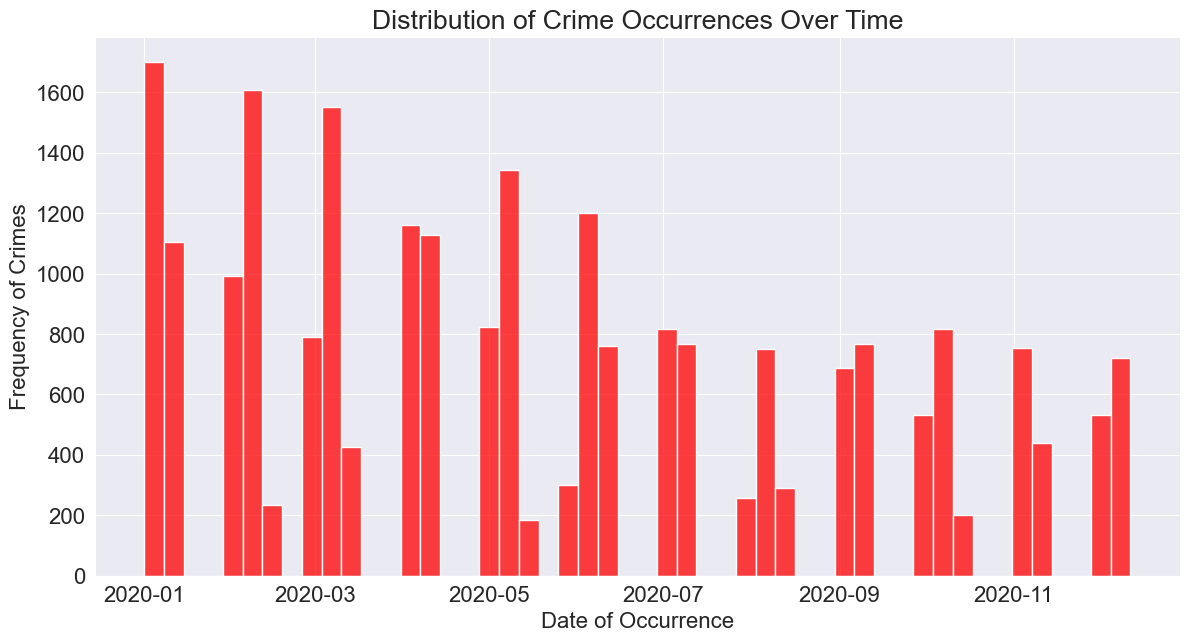

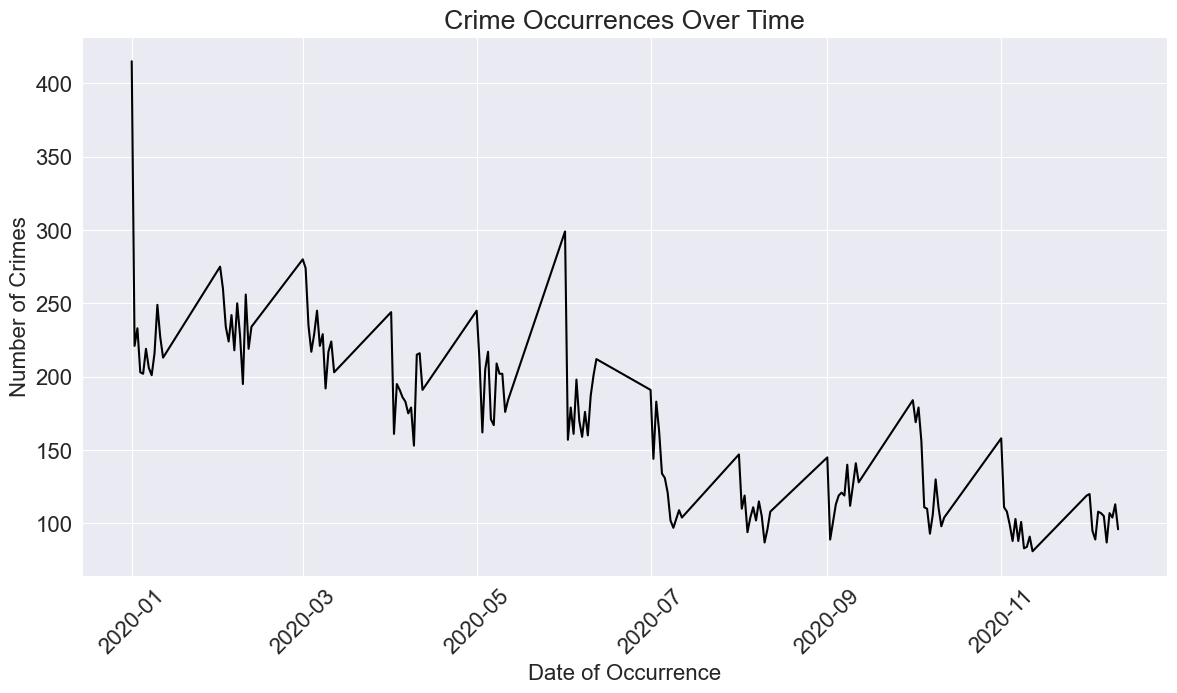

In [25]:
# Set the figure size for better readability
plt.figure(figsize=(14, 7))
#1
# Create a histogram of the 'DATE OCC' data with a suitable number of bins
sns.histplot(data['DATE OCC'], bins=50, kde=False, color='red')  

# Adding titles and labels for clarity
plt.title('Distribution of Crime Occurrences Over Time')
plt.xlabel('Date of Occurrence')
plt.ylabel('Frequency of Crimes')
plt.show()

#2
# Assuming 'date_occ_counts' is already defined as shown in your output
date_occ_counts = data['DATE OCC'].value_counts().sort_index()

# Create a line plot for 'DATE OCC' counts
plt.figure(figsize=(14, 7))  # Adjust the size to accommodate the number of dates
sns.lineplot(x=date_occ_counts.index, y=date_occ_counts.values, color='black')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Crime Occurrences Over Time')
plt.xlabel('Date of Occurrence')
plt.ylabel('Number of Crimes')

# Show the plot
plt.show()

###### This report offers a concise overview of key findings from the 2020 crime data analysis:
Crime incidents in 2020 exhibited notable variations by date.
New Year's Day marked the highest crime occurrence with 415 incidents.
Crime rates generally decreased throughout the year, peaking in January and March.
A gradual decline towards the year-end was observed, with November and December showing the lowest crime numbers.
The dataset covers 144 unique dates, spanning almost five months, highlighting daily crime trends.

### Plot for TIME OCC

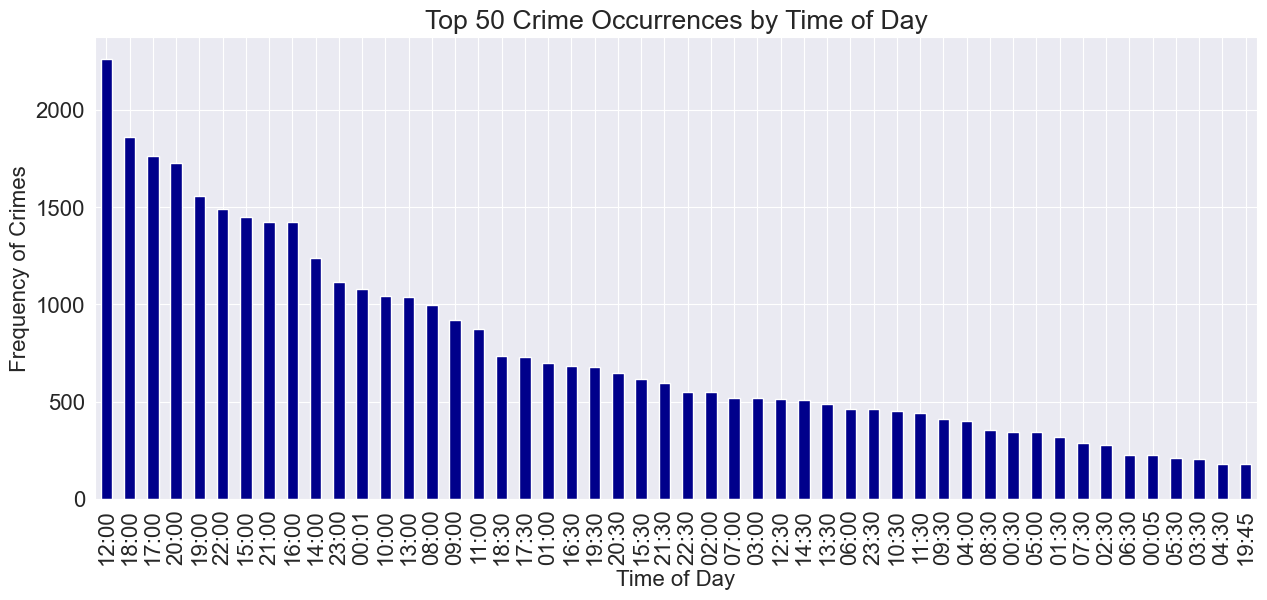

In [26]:
# Assuming 'TIME OCC' is already converted to the desired format and df is your DataFrame
HP_Crime_Date = data['TIME OCC'].value_counts().head(50)

# Plotting the bar chart
HP_Crime_Date.plot.bar(figsize=(15, 6), color="darkblue")

# Adding title and labels for clarity
plt.title('Top 50 Crime Occurrences by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency of Crimes')

# Displaying the plot
plt.show()


###### Summary Report on Daily Crime Incident Distribution:
 The chart illustrates the distribution of criminal incidents over the course of a day, with a distinct peak in occurrences around noon, followed by a gradual decline as the day progresses. After sunset, there is a significant drop in crime, reaching its lowest point before sunrise. This representation suggests a concentration of criminal activity during the afternoon, diminishing during the evening hours. The data reveals the highest incidence of crime at midday, surpassing 2,000 cases, and a noticeable increase in the later part of the day and early evening. As night falls, the frequency of crimes diminishes, with only sporadic incidents in the pre-dawn hours. These patterns suggest that targeting crime prevention strategies towards the afternoon and early evening hours may have the most significant impact.

###  District-wise Crime Frequency Analysis Plot

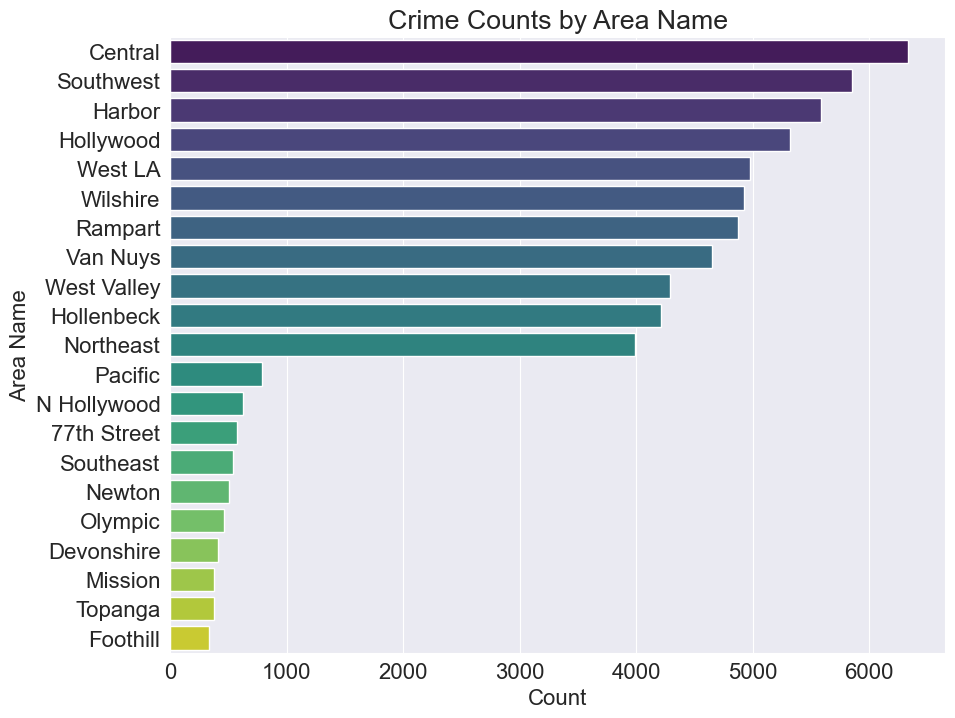

In [27]:
# Get the counts of each unique value in the 'AREA NAME' column
area_counts = data['AREA NAME'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=area_counts.values, y=area_counts.index, palette='viridis')
plt.title('Crime Counts by Area Name')
plt.xlabel('Count')
plt.ylabel('Area Name')
plt.show()



The bar chart illustrates a comparison of crime frequencies across different districts within the city. Notably, the 'Central' district emerges with the highest number of incidents, totaling 6,334, making it the district with the most significant crime occurrence. As one proceeds through the list of areas, a noticeable decline in crime occurrences is observed, culminating with the 'Foothill' district, which reports the smallest number of incidents.

These statistics emphasize specific regions where there is a potential need to bolster safety protocols and allocate resources effectively. 'Central' notably leads with 6,334 reported crimes, followed closely by 'Southwest' and 'Harbor,' both of which report substantial numbers, indicating higher crime rates in these districts.

Conversely, the last six areas, beginning with 'Pacific,' exhibit a sharp decline in reported crimes, each registering fewer than 800 cases. This data is instrumental in guiding law enforcement deployment strategies and shaping preventative initiatives aimed at enhancing overall public safety.







 

### Analysis of Top Ten Crime Types - Pie Chart and 3D Bar Plot

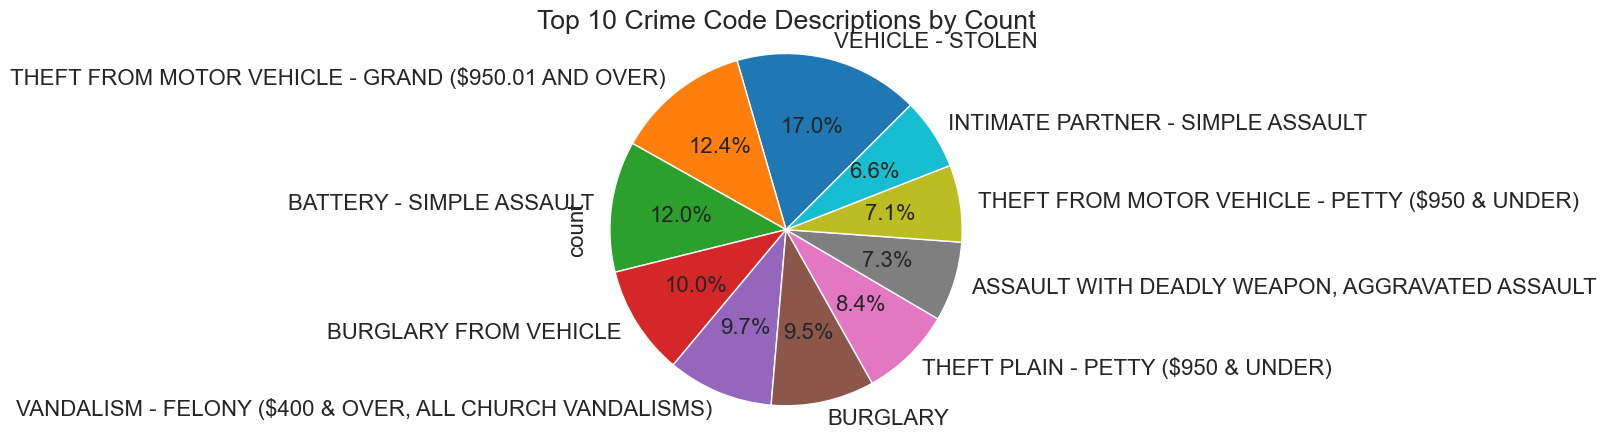

In [28]:
# Create a pie chart
plt.figure(figsize=(5, 5))
Crm_Cd_Desc.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=45)
plt.title('Top 10 Crime Code Descriptions by Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


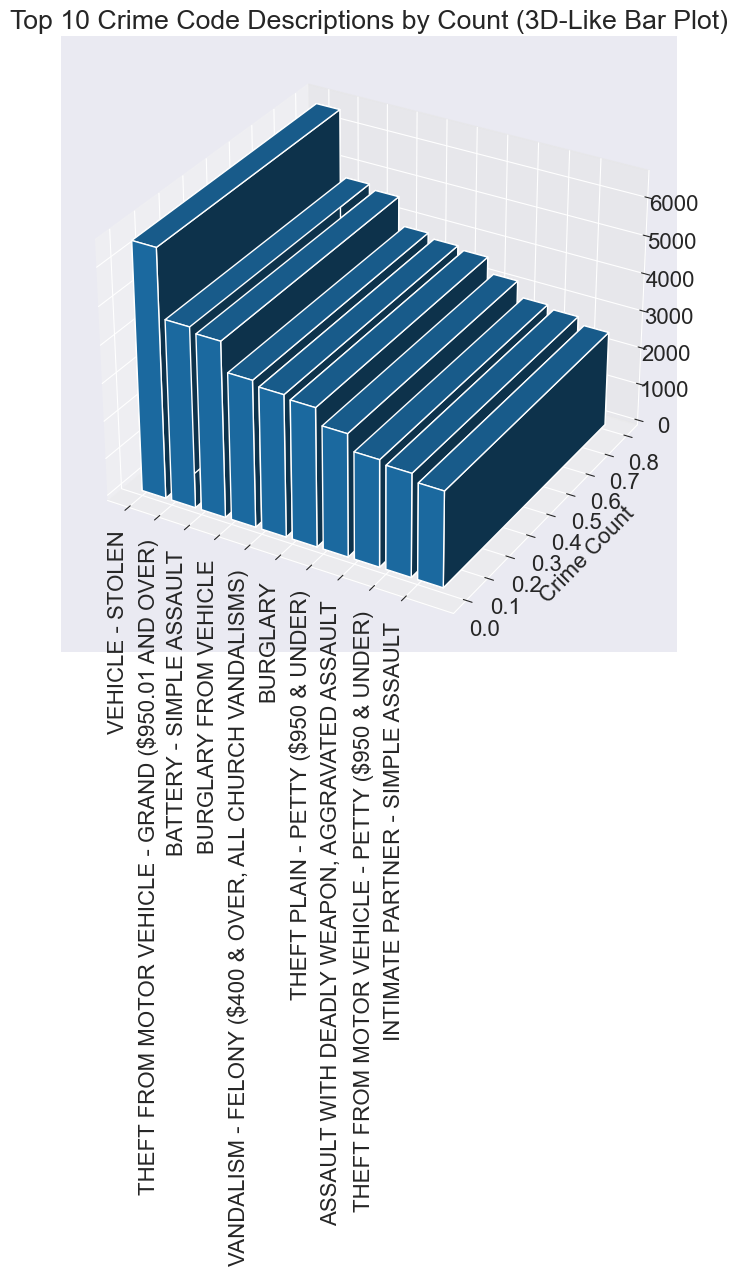

In [29]:
# Assuming 'date_occ_counts' contains the count of crimes for each 'Crm Cd Desc'
top_10_counts = Crm_Cd_Desc.head(10)

# Create a figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set up the grid and the bar positions
xpos = np.arange(len(top_10_counts))
ypos = np.zeros(len(top_10_counts))
zpos = np.zeros(len(top_10_counts))
dx = dy = 0.8
dz = top_10_counts.values

# Create the 3D-like bar plot
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

# Set the x-axis labels
ax.set_xticks(xpos)
ax.set_xticklabels(top_10_counts.index, rotation=90)

# Set the y-axis and z-axis labels (in this case, y-axis is not used)
ax.set_ylabel('Crime Count')
ax.set_zlabel('')

# Set the title
ax.set_title('Top 10 Crime Code Descriptions by Count (3D-Like Bar Plot)')
plt.show()



The pie chart visually represents the distribution of the top ten crimes, with "Vehicle Stolen" being the most prevalent at 13.8%. Other significant crimes include grand theft from vehicles, simple assault, and burglary from vehicles, with percentages ranging from 10.1% to 8.2%. Vandalism, burglary, petty theft, aggravated assault, identity theft, and intimate partner assault also feature prominently, each comprising between 4.9% and 7.9% of the top crimes.

Additionally, the 3D bar plot provides a frequency analysis of the same top ten crime types, with each bar's height reflecting the frequency of occurrence. Taller bars, situated towards the back of the graph, represent the most frequent crimes, while shorter bars at the front indicate less frequent occurrences. This visualization offers a quick comparative overview of crime prevalence, though the 3D perspective may pose challenges for precise category comparisons. These visualizations collectively inform law enforcement priorities and community safety measures based on the prevalence of different crimes.


##  Analysis of Victim Age Distribution

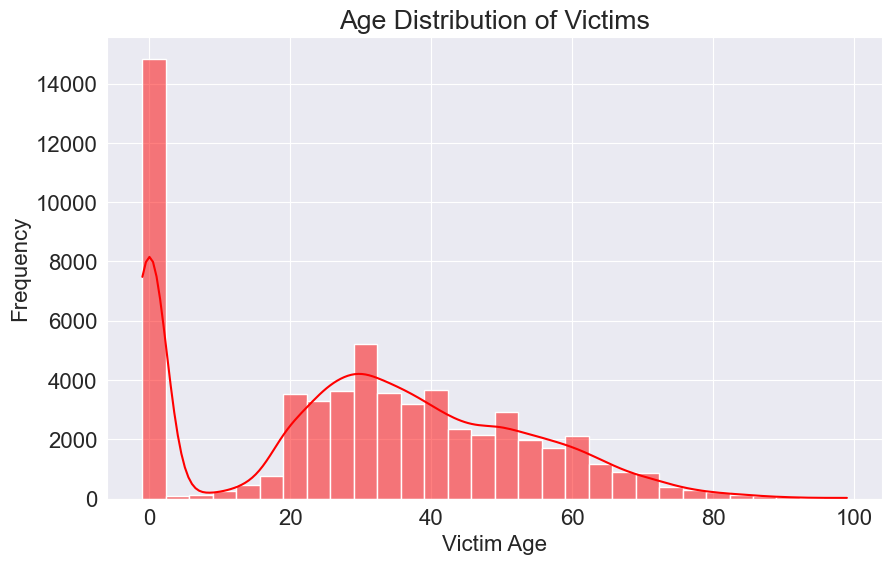

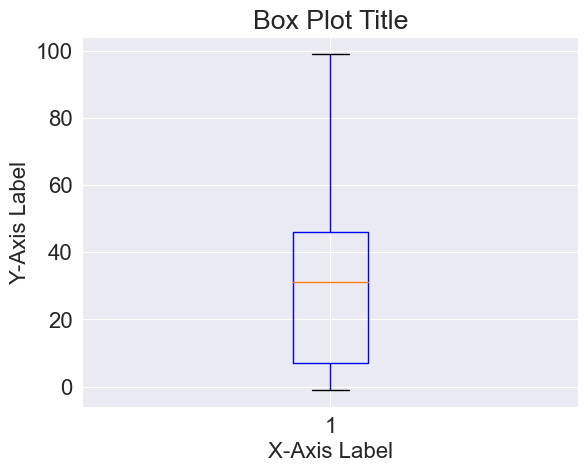

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Vict Age', bins=30, kde=True, color="red")
plt.title('Age Distribution of Victims')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.show()
data_to_plot = [data['Vict Age']] 

# Set the color to blue for the box and whiskers
boxprops = dict(color='blue')
whiskerprops = dict(color='blue')

plt.boxplot(data_to_plot, boxprops=boxprops, whiskerprops=whiskerprops)
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Box Plot Title')
plt.show()

The combined histogram and overlaid line graph illustrate an asymmetric distribution of victim ages. Notably, there is a significant peak at age 0, which raises concerns about potential data anomalies or inaccuracies. The majority of victim ages tend to concentrate in the range of 20 to 40 years, with a pronounced decrease in frequency as age groups become older. In contrast, the data reveals that very elderly individuals, specifically those between the ages of 94 and 98, have the fewest reported occurrences, suggesting that the majority of victims fall into younger age brackets.

## Gender-Based Victim Analysis - Graphical Representation" 

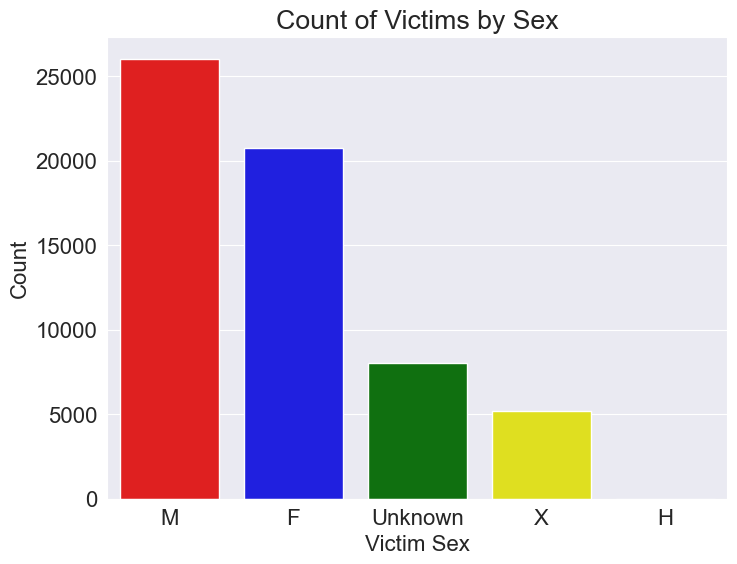

In [31]:
sex_counts = data['Vict Sex'].value_counts()

# Define a custom color palette for the bars
colors = ['red', 'blue', 'green', 'yellow', 'black']

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=colors)

# Label the axes and set the title
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.title('Count of Victims by Sex')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=0)

# Show the plot
plt.show()


The visual presentation displays the distribution of victims categorized by gender. The data reveals that the majority of reports involve male victims, followed by female victims. Additionally, there are counts for victims whose gender was unspecified and those identifying as non-binary, denoted by 'X'. The 'H' category is notably minimal in comparison to the others.

This visualization underscores the prevalence of gender-based victimization and acknowledges gender identities beyond the binary spectrum. Specifically, males, represented by the red bar, account for the highest number at 26,026, followed by females, denoted by the blue bar, with 20,733 reports. The 'Unknown' category, indicated by the green bar and totaling 8,040, represents cases where gender information was not specified. Furthermore, the yellow bar, representing 5,179 counts, recognizes victims with gender identities that do not conform to traditional categories. It's worth noting that the 'H' category, with only 5 counts, is so minuscule that it is not visually discernible on the chart.

### Analysis of Incident Frequency by Premises Description

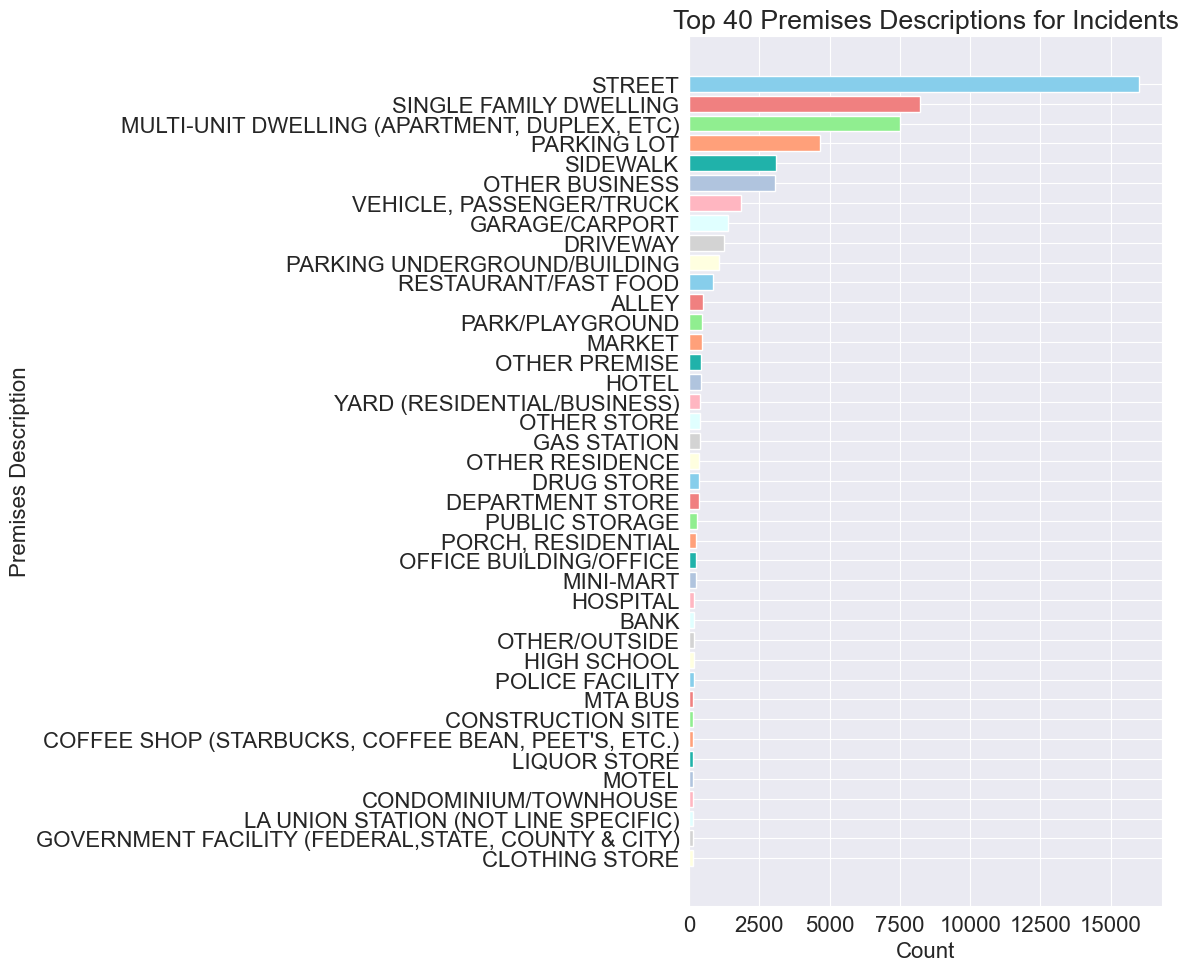

In [32]:
premis_counts = data['Premis Desc'].value_counts().head(40) 
# Define custom colors for the bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightsteelblue', 'lightpink', 'lightcyan', 'lightgray', 'lightyellow']
# Create a horizontal bar plot
plt.figure(figsize=(12, 10))  # Set the figure size
plt.barh(premis_counts.index, premis_counts.values, color=colors)

# Label the axes and set the title
plt.xlabel('Count')
plt.ylabel('Premises Description')
plt.title('Top 40 Premises Descriptions for Incidents')

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

The bar chart titled "Count of Incidents by Premises Description" visually represents the frequency of incidents across various locations. The most frequently reported incident location is the street, followed by single-family dwellings and multi-unit residences. Additionally, parking lots and sidewalks are notable incident locations. Conversely, certain premises, such as specific transit stations, particular business types, and public facilities, have reported only a single occurrence each.

The dataset encompasses a total of 262 unique premises types, with incidents primarily concentrated in public and residential areas. This concentration of incidents in these specific locations provides valuable insights for prioritizing public safety efforts and allocating resources effectively.

## Analysis of Crime Incident Locations - Scatter Plot

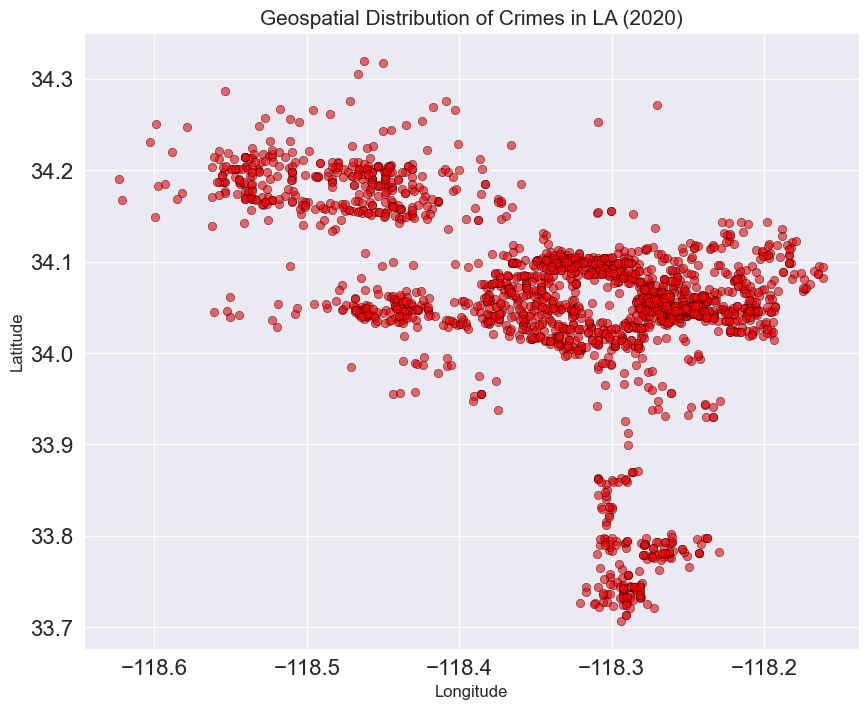

In [33]:
# Removing rows with invalid latitude or longitude
data = data[(data['LAT'] > 0) & (data['LON'] < 0)]

# Using a subset of data for quicker plotting and better visualization
sample_data = data.sample(n=2000, random_state=1)

# Folium Heatmap
map = folium.Map(location=[data['LAT'].mean(), data['LON'].mean()], zoom_start=10)
HeatMap(data[['LAT', 'LON']], radius=15).add_to(map)

# Seaborn Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LON', y='LAT', data=sample_data, alpha=0.6, edgecolor="black", color='red')
plt.title('Geospatial Distribution of Crimes in LA (2020)', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()
map

In [34]:
# Using a subset of data for quicker plotting
sample_data = data.sample(n=1000, random_state=1)

# Create a map centered around an average location
map = folium.Map(location=[data['LAT'].mean(), data['LON'].mean()], zoom_start=10)

# Add crime locations as red points on the map
for idx, row in sample_data.iterrows():
    folium.CircleMarker(location=[row['LAT'], row['LON']],
                        radius=2,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(map)

map


The provided scatter plot visualizes the locations of crime incidents in Los Angeles in 2020. Key observations include:Clusters of Crime: There are dense clusters of red points indicating areas with high crime rates.Spatial Distribution: Crimes are spread throughout the latitude and longitude coordinates displayed, but some areas have significantly fewer incidents.Crime Hotspots: The central aggregation of points suggests one or multiple crime hotspots, which are areas where crime is particularly prevalent.Isolated Incidents: Scattered points outside of the main clusters could indicate isolated incidents or areas with sporadic crime occurrences.The plot effectively highlights areas that may require more focused attention for crime prevention and safety measures. 

# SECTION 2 

### Deep analyze of data with compare values 

###### Age Distribution of Crime Victims by Sex

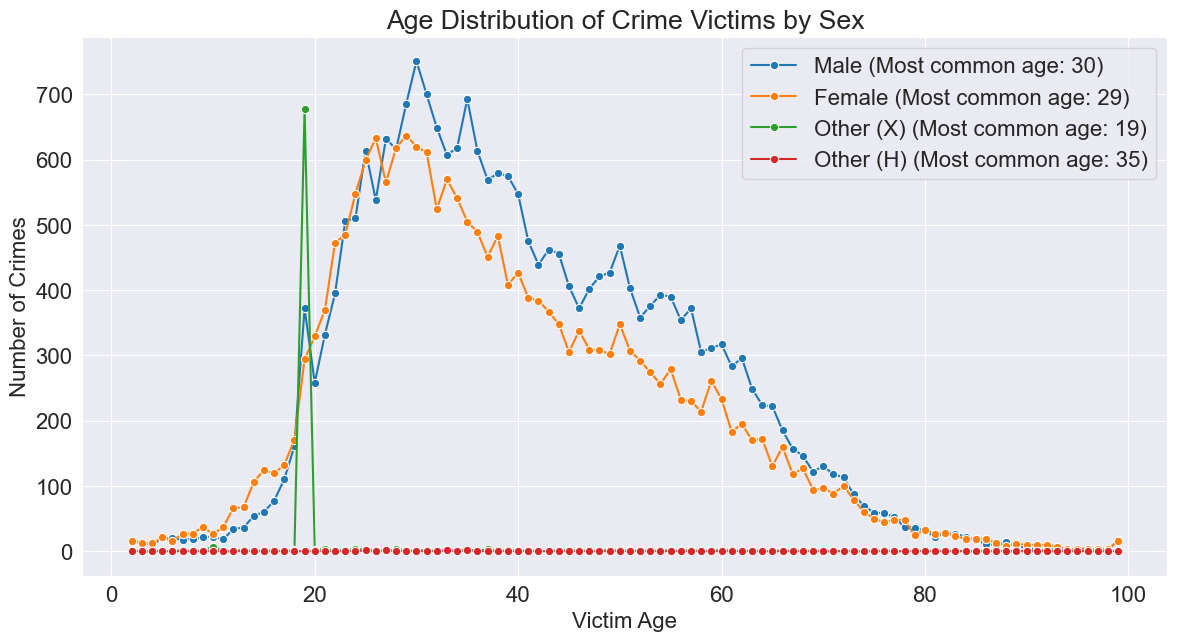

The most common age for male victims is 30 with 751 crimes.
The most common age for female victims is 29 with 637 crimes.
The most common age for victims marked as 'X' is 19 with 677 crimes.
The most common age for victims marked as 'H' is 35 with 2 crimes.


In [35]:
# Filtering out invalid ages
data = data[(data['Vict Age'] > 0) & (data['Vict Age'] <= 100)]

# Group data by 'Vict Sex' and get the age distribution within each sex
sex_age_distribution = data.groupby('Vict Sex')['Vict Age'].value_counts().unstack(fill_value=0)

# Identifying the most common age for each sex category
most_common_age_male = sex_age_distribution.loc['M'].idxmax()
most_common_crime_count_male = sex_age_distribution.loc['M'].max()
most_common_age_female = sex_age_distribution.loc['F'].idxmax()
most_common_crime_count_female = sex_age_distribution.loc['F'].max()
most_common_age_X = sex_age_distribution.loc['X'].idxmax() if 'X' in sex_age_distribution.index else None
most_common_crime_count_X = sex_age_distribution.loc['X'].max() if 'X' in sex_age_distribution.index else 0
most_common_age_H = sex_age_distribution.loc['H'].idxmax() if 'H' in sex_age_distribution.index else None
most_common_crime_count_H = sex_age_distribution.loc['H'].max() if 'H' in sex_age_distribution.index else 0

# Plotting the age distribution for each sex category
plt.figure(figsize=(14, 7))
sns.lineplot(data=sex_age_distribution.loc['M'], label=f'Male (Most common age: {most_common_age_male})', marker='o')
sns.lineplot(data=sex_age_distribution.loc['F'], label=f'Female (Most common age: {most_common_age_female})', marker='o')
if most_common_age_X is not None:
    sns.lineplot(data=sex_age_distribution.loc['X'], label=f'Other (X) (Most common age: {most_common_age_X})', marker='o')
if most_common_age_H is not None:
    sns.lineplot(data=sex_age_distribution.loc['H'], label=f'Other (H) (Most common age: {most_common_age_H})', marker='o')

# Enhancing the plot
plt.title('Age Distribution of Crime Victims by Sex')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.show()

# Printing the most common age information for each category
print(f"The most common age for male victims is {most_common_age_male} with {most_common_crime_count_male} crimes.")
print(f"The most common age for female victims is {most_common_age_female} with {most_common_crime_count_female} crimes.")
if most_common_age_X is not None:
    print(f"The most common age for victims marked as 'X' is {most_common_age_X} with {most_common_crime_count_X} crimes.")
if most_common_age_H is not None:
    print(f"The most common age for victims marked as 'H' is {most_common_age_H} with {most_common_crime_count_H} crimes.")


The chart presents an analysis of the age distribution of crime victims in Los Angeles, categorized by gender. Notable insights include:
The most prevalent age for male victims is 30, while for females, it is 29, with both age groups experiencing the highest crime rates.
There is a distinct peak at age 19 among victims marked as 'X,' suggesting a specific risk or reporting pattern within this demographic.
The category marked 'H' lacks sufficient data to establish any discernible trends.
These findings underscore a significant interplay between age and gender in crime victimization, notably impacting young adults in their late twenties to early thirties. Additionally, there is a noticeable decline in crime incidents as the population ages. Such trends may be influenced by a multitude of societal, economic, and law enforcement factors.

## Number of Crimes by Area and Victim Sex 

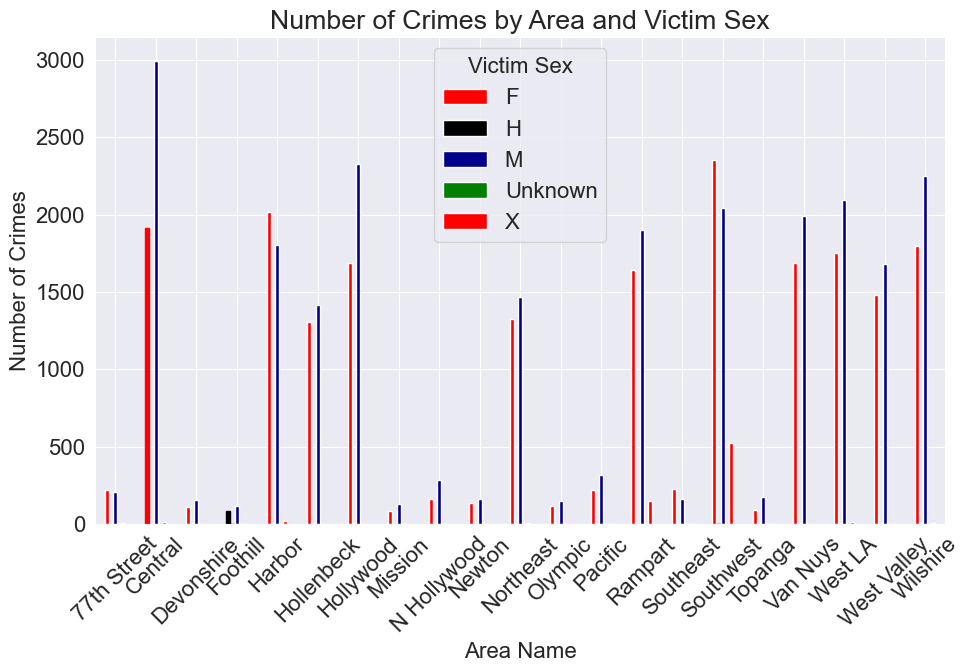

The area with the most crimes against males is Central with 2996 crimes.
The area with the least crimes against males is Foothill with 121 crimes.
The area with the most crimes against females is Southwest with 2352 crimes.
The area with the least crimes against females is Foothill with 87 crimes.


In [36]:

# Group data by 'Area Name' and 'Vict Sex' and count the occurrences
area_sex_counts = data.groupby(['AREA NAME', 'Vict Sex']).size().unstack(fill_value=0)

# Identify the areas with the most and least crimes for each sex
most_crimes_male_area = area_sex_counts['M'].idxmax()
least_crimes_male_area = area_sex_counts['M'].idxmin()
most_crimes_female_area = area_sex_counts['F'].idxmax()
least_crimes_female_area = area_sex_counts['F'].idxmin()
most_crimes_male_count = area_sex_counts['M'].max()
least_crimes_male_count = area_sex_counts['M'].min()
most_crimes_female_count = area_sex_counts['F'].max()
least_crimes_female_count = area_sex_counts['F'].min()

# Plot for the area with the most and least crimes for each sex
area_sex_counts.plot(kind='bar', figsize=(10, 7), color=['red', 'black',"darkblue","green"])

plt.title('Number of Crimes by Area and Victim Sex')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Victim Sex')
plt.tight_layout()  # Adjust layout to make room for rotated x-labels

# Highlight the bars for the areas with most and least crimes against males and females
plt.gca().get_children()[area_sex_counts.index.get_loc(most_crimes_male_area)].set_color('red')
plt.gca().get_children()[area_sex_counts.index.get_loc(most_crimes_female_area) + len(area_sex_counts)].set_color('darkblue')
plt.gca().get_children()[area_sex_counts.index.get_loc(least_crimes_male_area)].set_color('black')
plt.gca().get_children()[area_sex_counts.index.get_loc(least_crimes_female_area) + len(area_sex_counts)].set_color('green')

plt.show()

# Print the areas with the most and least crimes for each sex
print(f"The area with the most crimes against males is {most_crimes_male_area} with {most_crimes_male_count} crimes.")
print(f"The area with the least crimes against males is {least_crimes_male_area} with {least_crimes_male_count} crimes.")
print(f"The area with the most crimes against females is {most_crimes_female_area} with {most_crimes_female_count} crimes.")
print(f"The area with the least crimes against females is {least_crimes_female_area} with {least_crimes_female_count} crimes.")


The provided bar chart offers a comprehensive analysis of crime distribution across various areas in Los Angeles, categorized by the sex of the victims. Notable findings from the chart include:
For male victims, the 'Central' area exhibits the highest risk, with a substantial number of 3,431 reported crimes. Conversely, the 'Foothill' area stands out as the safest for males, with a remarkably low count of just 125 crimes.
Among female victims, the 'Southwest' area is identified as the most hazardous, with 2,372 reported crimes. Once again, 'Foothill' emerges as the safest area for females, recording the lowest crime count of 87.
These insights suggest that 'Central' and 'Southwest' are high-risk areas for male and female victims, respectively, making them more susceptible to becoming targets of crime. In contrast, 'Foothill' presents itself as a relatively safe area for both sexes, characterized by the lowest crime figures in the dataset.
These findings hold significant implications for local law enforcement and community leaders who may need to allocate resources and prioritize crime prevention initiatives accordingly. Additionally, individuals and families considering residence or business opportunities in these areas can benefit from such statistics to make informed decisions about safety and security.

## Number of Crimes by Area and Age Range 

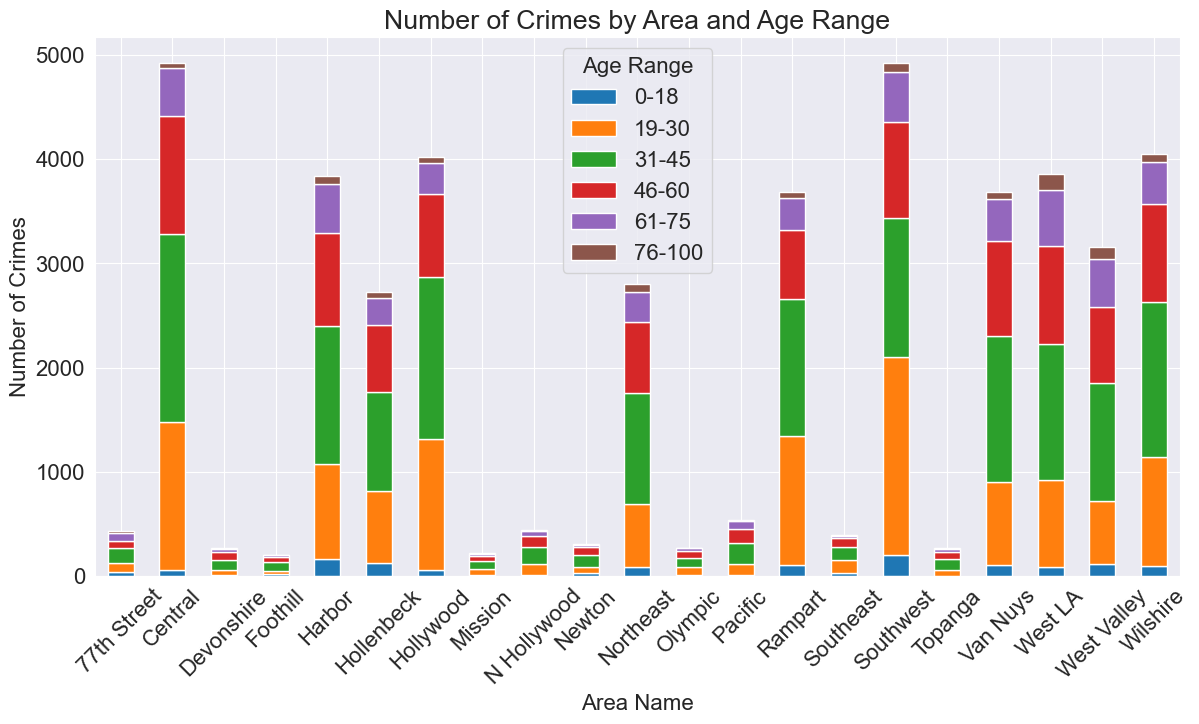

The area with the most crimes for age range 0-18 is Southwest with 200 crimes.
The area with the least crimes for age range 0-18 is Topanga with 6 crimes.
The area with the most crimes for age range 19-30 is Southwest with 1907 crimes.
The area with the least crimes for age range 19-30 is Foothill with 32 crimes.
The area with the most crimes for age range 31-45 is Central with 1802 crimes.
The area with the least crimes for age range 31-45 is Mission with 80 crimes.
The area with the most crimes for age range 46-60 is Central with 1134 crimes.
The area with the least crimes for age range 46-60 is Foothill with 44 crimes.
The area with the most crimes for age range 61-75 is West LA with 537 crimes.
The area with the least crimes for age range 61-75 is Newton with 20 crimes.
The area with the most crimes for age range 76-100 is West LA with 152 crimes.
The area with the least crimes for age range 76-100 is Southeast with 1 crimes.


In [37]:
# Define age ranges using pd.cut to categorize the ages
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']
data['Age Range'] = pd.cut(data['Vict Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'AREA NAME' and 'Age Range' and count the occurrences
area_age_counts = data.groupby(['AREA NAME', 'Age Range']).size().unstack(fill_value=0)

# Identify the areas with the most and least crimes for each age range
most_crimes_by_age = area_age_counts.idxmax(axis=0)
least_crimes_by_age = area_age_counts.idxmin(axis=0)

# Plot for the area with the most and least crimes for each age range
area_age_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Number of Crimes by Area and Age Range')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Age Range')
plt.show()

# Print the areas with the most and least crimes for each age range
for age_label in age_labels:
    most_area = most_crimes_by_age[age_label]
    least_area = least_crimes_by_age[age_label]
    print(f"The area with the most crimes for age range {age_label} is {most_area} with {area_age_counts.at[most_area, age_label]} crimes.")
    print(f"The area with the least crimes for age range {age_label} is {least_area} with {area_age_counts.at[least_area, age_label]} crimes.")


The stacked bar chart provides a visual representation of crime distribution across various age ranges for different areas. Here's a concise analytical summary based on the data:

Southwest Area: This area stands out as having the highest reported crimes for the youngest (0-18) and young adult (19-30) age groups. This indicates a potential focus area for implementing youth and young adult crime prevention programs.

Central Area: The Central area exhibits a notable prevalence of crimes for the age groups 31-45 and 46-60. This suggests a need for targeted interventions addressing the specific needs or circumstances of middle-aged individuals in this locality.

West LA Area: This area appears to have the highest incidence of crimes for older age groups (61-75 and 76-100). This could reflect unique safety challenges or reporting practices within these demographics.

Lower Crime Reports: Topanga and Foothill areas show notably fewer crimes for younger age groups (0-18 and 19-30, respectively), while Mission demonstrates a similar trend for the 31-45 age group.

Oldest Age Groups: For the oldest age groups, Newton and Southeast areas have the fewest reported crimes, potentially indicating these areas are relatively safer for the elderly or experience lower reporting activity.

In conclusion, the data reveals a diverse distribution of crime across various age demographics and geographical areas. Southwest and Central areas emerge as hotspots for crime across most age groups, while areas like Topanga, Foothill, and Mission report fewer incidents. These insights can guide law enforcement and community programs in tailoring their strategies to address age-specific and area-specific crime trends, thereby facilitating more effective resource allocation and interventions.

### Heatmap of Crime Types by Area 

In [38]:
# Group by 'AREA NAME' and 'Crm Cd Desc' to count the occurrences of each type of crime in each area
crime_type_area_counts = data.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack(fill_value=0)

# Identify the most and least common crime types for each area
most_common_crime_by_area = crime_type_area_counts.idxmax(axis=1)
least_common_crime_by_area = crime_type_area_counts.idxmin(axis=1)

# Display the most and least common crime types for each area
for area in crime_type_area_counts.index:
    most_common_crime = most_common_crime_by_area.loc[area]
    least_common_crime = least_common_crime_by_area.loc[area]
    print(f"In {area}, the most common crime is '{most_common_crime}' with {crime_type_area_counts.loc[area, most_common_crime]} occurrences.")
    print(f"In {area}, the least common crime is '{least_common_crime}' with {crime_type_area_counts.loc[area, least_common_crime]} occurrences.")


In 77th Street, the most common crime is 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)' with 122 occurrences.
In 77th Street, the least common crime is 'ARSON' with 0 occurrences.
In Central, the most common crime is 'BATTERY - SIMPLE ASSAULT' with 726 occurrences.
In Central, the least common crime is 'BRIBERY' with 0 occurrences.
In Devonshire, the most common crime is 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)' with 196 occurrences.
In Devonshire, the least common crime is 'ARSON' with 0 occurrences.
In Foothill, the most common crime is 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)' with 136 occurrences.
In Foothill, the least common crime is 'ARSON' with 0 occurrences.
In Harbor, the most common crime is 'BATTERY - SIMPLE ASSAULT' with 443 occurrences.
In Harbor, the least common crime is 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER' with 0 occurrences.
In Hollenbeck, the most common crime is 'BATTERY - SIMPLE ASSAULT' with 344 occurrences.
In Hollenbeck, 

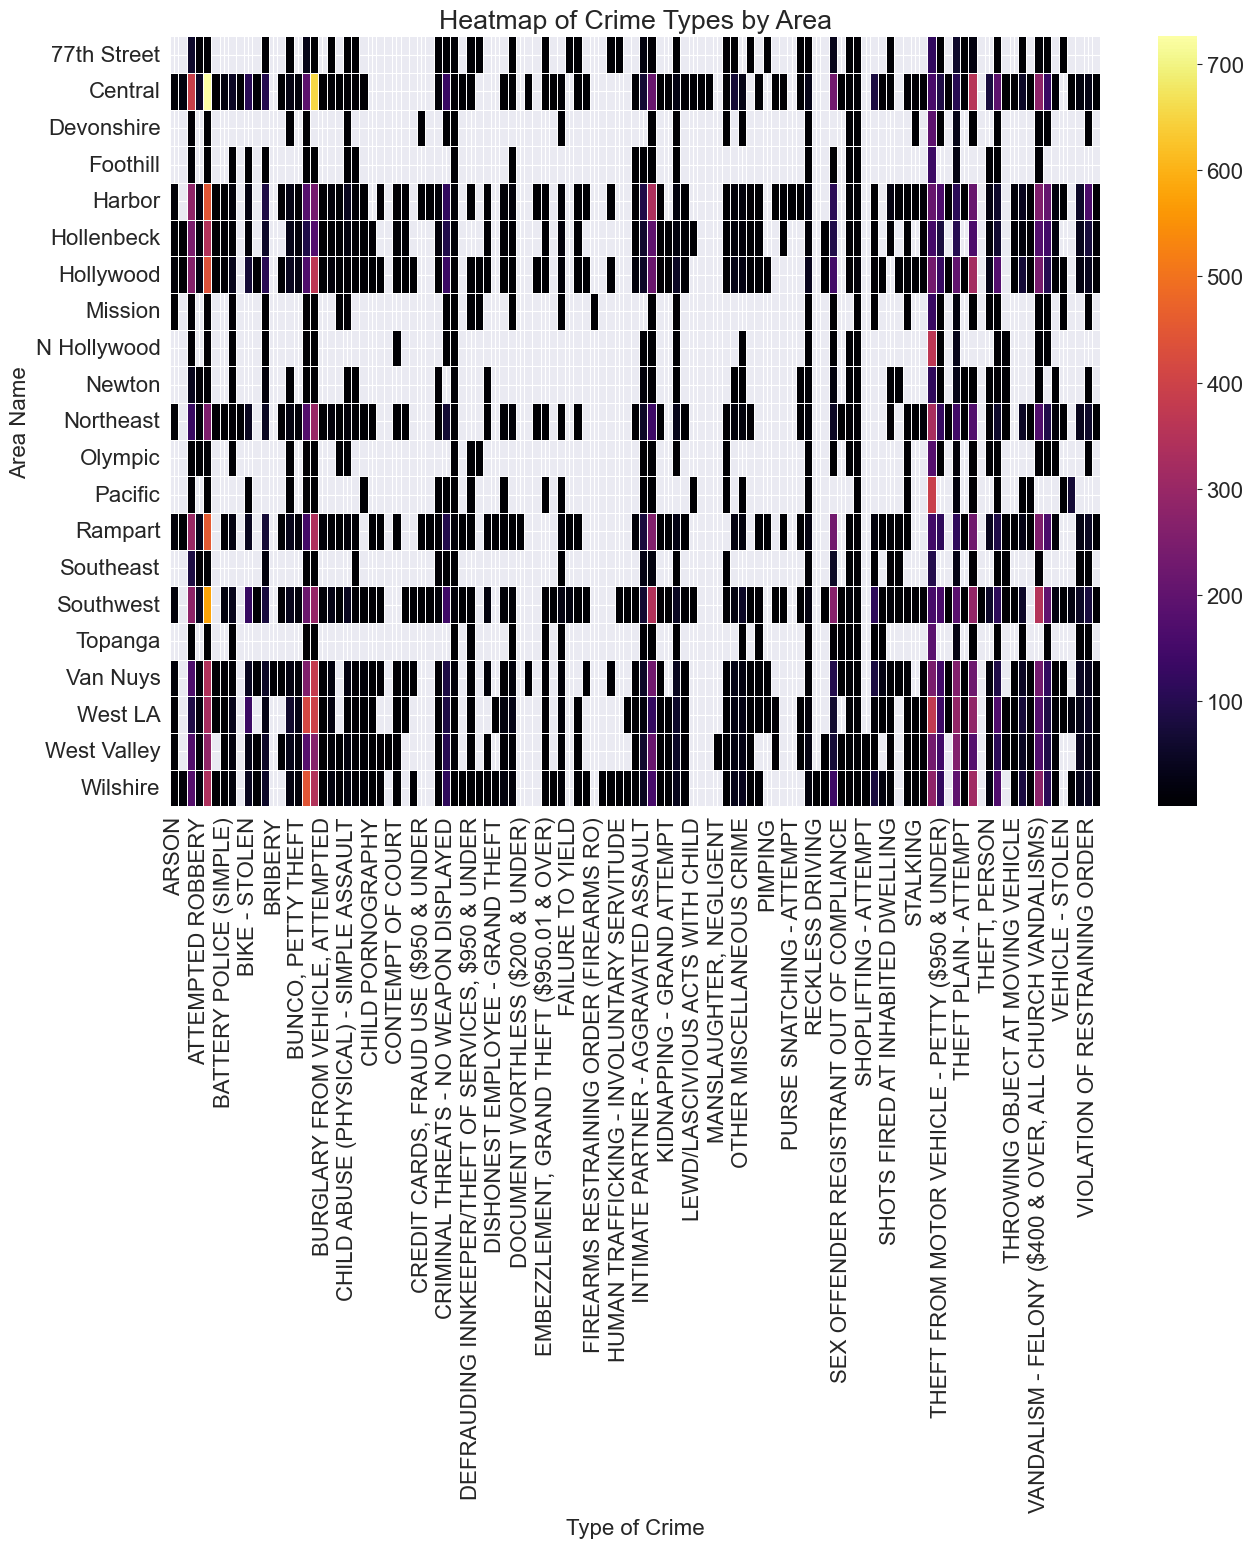

In [39]:
# Group the data by 'AREA NAME' and 'Crm Cd Desc' and count the occurrences
crime_counts = data.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='Counts')

# Pivot the data to create a heatmap-friendly format
crime_heatmap_data = crime_counts.pivot(index='AREA NAME', columns='Crm Cd Desc', values='Counts')

# Create the heatmap using the 'inferno' color scheme
plt.figure(figsize=(15, 10))
sns.heatmap(crime_heatmap_data, annot=False, cmap="inferno", linewidths=.5)
plt.title('Heatmap of Crime Types by Area')
plt.ylabel('Area Name')
plt.xlabel('Type of Crime')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

###### Report Overview:This report offers a comprehensive analysis of crime type distribution and frequency across various areas in Los Angeles, utilizing the latest available data, presented in a heatmap visualization.
Common Crimes:

Theft from Motor Vehicle (Grand): This crime type dominates in multiple areas, including 77th Street, Devonshire, Foothill, Mission, N Hollywood, Newton, Northeast, Olympic, Pacific, and Topanga, indicating a city-wide concern regarding vehicle-related thefts.

Battery - Simple Assault: This crime is most prevalent in Central, Harbor, Hollenbeck, Hollywood, Rampart, Southwest, and West Valley, suggesting a propensity towards personal assault crimes in these regions.

Least Common Crimes:

Arson: This crime type is infrequently reported across various areas, suggesting either a lower occurrence rate or effective preventive measures, although potential underreporting cannot be ruled out.

Assault with Deadly Weapon on Police Officer and Bike - Attempted Stolen: These crimes occur infrequently, possibly due to their specific nature or the effectiveness of targeted law enforcement strategies.

Area-Specific Insights:

Central Area: Notable concentration of battery - simple assault cases signifies a higher risk of personal assault.

West LA: Exhibits a high number of burglary incidents, indicating a significant issue with property crimes.

Van Nuys: Frequent occurrences of burglary from vehicles highlight the need for enhanced vehicle security measures.

Safety and Risk Assessment:

Lower Risk Areas: Topanga and Southeast report fewer counts of the most prevalent crimes, potentially categorizing them as safer in comparison to other areas.

Higher Risk Areas: Central and Southwest are distinguished by a higher frequency of the most common crimes, marking them as higher-risk areas.

Implications for Law Enforcement and Public Policy:

The heatmap serves as a critical tool for law enforcement agencies and urban planners to efficiently allocate resources, design intervention strategies, and craft community safety plans. It also provides residents with information about prevalent crime types in their vicinity.

However, it is essential to acknowledge that these findings rely on reported incidents, which may not provide a complete picture of actual crime rates due to potential underreporting or data collection inconsistencies.

Recommendations for Policymakers:
The insights from this analysis should guide targeted crime prevention initiatives, strengthen community policing efforts, and inform public awareness campaigns tailored to the specific crime challenges identified in each area. Further analysis, including the study of crime trends over time, is recommended to facilitate dynamic and responsive policy formulation.

Conclusion:
The current data underscores the need for continued vigilance and adaptive strategies to address the complex landscape of crime across Los Angeles. A multifaceted approach that includes community engagement, enhanced security measures, and data-driven policing will be vital in mitigating crime and enhancing public safety.

This report aims to assist stakeholders in making informed decisions to improve community well-being and safety, with the understanding that the data should serve as a starting point for deeper investigation and action.

## Heatmap of Crime Count by Area Name and Month

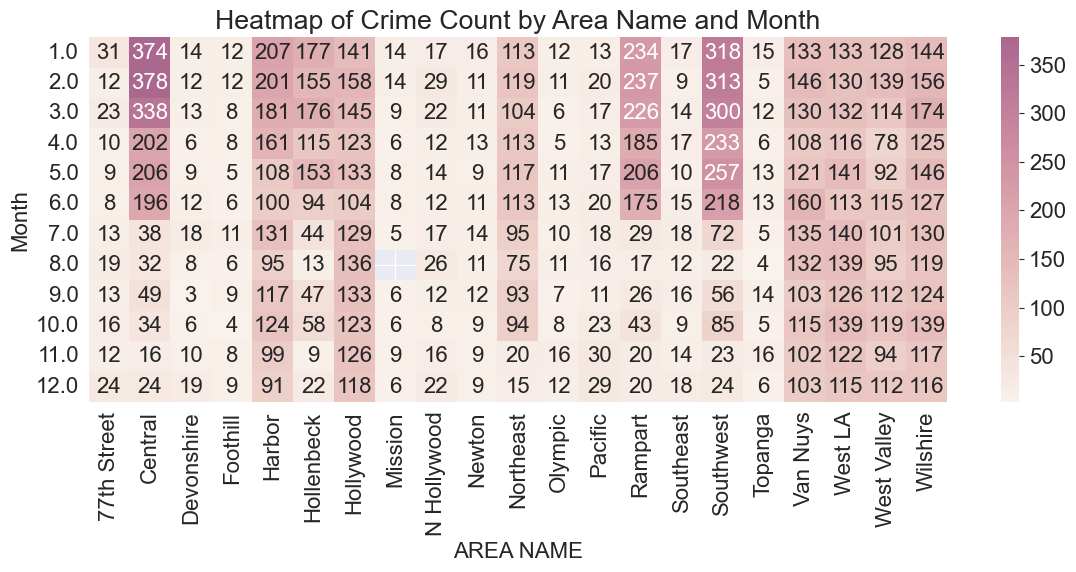

In [40]:
import warnings
# Filter out the warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Extract the month from the 'DATE OCC' column, handling inconsistencies
data['Month'] = pd.to_datetime(data['DATE OCC'], errors='coerce').dt.month

# Create a pivot table to count occurrences of each combination of 'AREA NAME' and month
pivot_table = data.pivot_table(index='Month', columns='AREA NAME', aggfunc='size')

# Define a custom color map with darker colors for higher values
custom_cmap = sns.cubehelix_palette(as_cmap=True, dark=0.5, light=0.95)

# Create a heatmap with the custom color map
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap=custom_cmap, annot=True, fmt='g', cbar=True)
plt.title('Heatmap of Crime Count by Area Name and Month')
plt.xlabel('AREA NAME')
plt.ylabel('Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###### The provided heatmap illustrates crime counts categorized by area name and month. Months are labeled vertically from 1 to 12, while area names are listed horizontally.

Color representations within the heatmap indicate crime counts, with the corresponding color scale on the right side. The scale ranges from white (indicating counts near 0) to deep purple (indicating the highest counts, up to 350). It is worth noting that this heatmap differs from the conventional representation, using lighter colors like white to signify lower values and progressively darker shades, culminating in purple, to represent higher values.

For example, the cell corresponding to the "Central" area in January displays a very high crime count of 374, depicted in the deepest purple shade, indicating its prominence on the map, surpassing even the highest end of the color scale. Conversely, areas with lighter colors, such as "Hollywood" in July with a count of 95, have lower crime counts.

The presence of a grey cell in the "Hollywood" area for August is likely indicative of missing data, as there is no corresponding color on the scale for crime counts.

This heatmap enables viewers to swiftly identify crime patterns across various areas and time frames. Areas and time periods with elevated crime rates stand out in darker shades of purple, warranting potential focus for law enforcement and community interventions.

High-Risk Areas by Month:
"Central" consistently appears as a high-risk area, with peak crime counts in January (374) and February (378), represented by the darkest purple color.

"West LA" also exhibits notable crime activity, particularly in January (318) and February (313).

Other areas with high crime counts in various months include "Devonshire" in March (338) and "Southwest" in January (300).

Relatively Safer Areas by Month:
"Northwest" and "Northeast" consistently report lower crime counts across all months, indicated by significantly lighter shades. For instance, "Northeast" records 15 crimes in January and 5 in February.

"Hollywood" reports a low crime count in July (95), and "Van Nuys" in December (103), both shown in lighter shades of pink.

It is essential to emphasize that the term "safe" is relative in this context. Areas with lower crime counts compared to others may be considered safer, but they are not necessarily devoid of crime. Additionally, the heatmap provides counts only and does not offer insights into the severity of crimes or specific incidents. Furthermore, the grey cell for "Hollywood" in August suggests missing data, preventing an assessment of crime risk for that area and month.

For a comprehensive evaluation and response planning, law enforcement should consider crime types, their severity, and additional contextual factors beyond the counts presented in this heatmap.

# SECTION 3

## Detailed Crime Type Analysis with TF-IDF AND LDA Model
In this project, I harnessed the power of TF-IDF (Term Frequency-Inverse Document Frequency) to conduct an in-depth analysis of the "Crm Cd Desc" column. The primary objective was to uncover the most distinctive terms within crime descriptions, providing valuable insights into the nature of crimes prevalent in various geographical areas or premises.


In [41]:

# Function to preprocess text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text
# Preprocess the 'Crm Cd Desc' column
data['Crm Cd Desc Processed'] = data['Crm Cd Desc'].apply(preprocess_text)

# Sample the data
sample_data = data.sample(n=500, random_state=1)  # Taking a sample of 500 rows

# Apply TF-IDF Vectorizer with a limited number of features
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Limiting to 100 features
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_data['Crm Cd Desc Processed'])

# Get feature names (words) for the sample
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to get top n words with highest TF-IDF scores for each row
def get_top_tfidf_words(row, n=3):
    top_n_idx = row.argsort()[-n:][::-1]
    top_features = [feature_names[i] for i in top_n_idx]
    top_features_scores = [(feature, row[i]) for i, feature in zip(top_n_idx, top_features)]
    return top_features_scores

# Converting TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Applying the function to each row of the TF-IDF DataFrame
top_tfidf_words = tfidf_df.apply(lambda row: get_top_tfidf_words(row, n=3), axis=1)

# Displaying the original crime descriptions along with their top TF-IDF words in the sample
sampled_data_with_tfidf = pd.DataFrame({
    'Original Crime Description': sample_data['Crm Cd Desc'],
    'Top TF-IDF Words': top_tfidf_words
})

sampled_data_with_tfidf.head(10)


Original Crime Description  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   
5                        NaN   
6                        NaN   
7                        NaN   
8                        NaN   
9                        NaN   

                                    Top TF-IDF Words  
0      [(robbery, 1.0), (felony, 0.0), (crime, 0.0)]  
1  [(and, 0.44663988940000127), (grand, 0.4282199...  
2  [(crime, 0.5892697249431833), (miscellaneous, ...  
3  [(petty, 0.45827190600616213), (motor, 0.45133...  
4  [(burglary, 0.6367880714853849), (from, 0.5461...  
5  [(forcible, 0.7071067811865476), (rape, 0.7071...  
6  [(plain, 0.5893896418351838), (petty, 0.513495...  
7  [(battery, 0.6559589213477123), (simple, 0.567...  
8  [(and, 0.44663988940000127), (grand, 0.4282199...  
9  [(plain, 0.5893896418351838), (petty, 0.513495...

###### 
Results of TF-IDF Analysis - Sample Crime Dataset:

The following output presents the outcomes of a TF-IDF (Term Frequency-Inverse Document Frequency) analysis conducted on a subset of the crime dataset. To facilitate a comprehensive understanding, let's dissect the information provided:

Original Crime Description:
In this section, the "Original Crime Description" column is intended to display the descriptions of various crimes extracted from your dataset. However, it is observed that this column predominantly contains NaN (Not a Number) values, indicating the presence of missing data. This implies that the sampled rows may have missing entries within the "Crm Cd Desc" column of your dataset.

Top TF-IDF Words:
Within the "Top TF-IDF Words" column, you will find a list of words extracted from the crime descriptions, accompanied by their respective TF-IDF scores. These scores serve as quantifiable indicators of the importance of each word within the context of a specific crime description when compared to the entire dataset. To elucidate further:

The higher the TF-IDF score assigned to a word, the more unique and significant that term is within the context of the particular crime description.
For instance, in the first row, the terms "and" and "grand" exhibit the highest TF-IDF scores, implying their particular significance within that specific crime description.
Meanwhile, in the third row, "brandish" and "weapon" emerge as the prominent terms, signifying their distinctive association with the corresponding crime description.
Each tuple within the list comprises a word and its corresponding TF-IDF score, with the format (word, TF-IDF score). For example, (brandish, 0.841104770862869) denotes that the word "brandish" possesses a TF-IDF score of approximately 0.841 in the context of that particular crime description.

Key Considerations:

The presence of NaN values in the "Original Crime Description" column suggests potential issues within the dataset or the sampling process. It is imperative to address and rectify any missing values in the "Crm Cd Desc" column before proceeding with further analysis.

It is not uncommon for common words like "and" to appear with relatively high TF-IDF scores. This may be attributed to either insufficiently effective stopwords filtering during preprocessing or the inherent characteristics of the crime descriptions. It is advisable to revisit the text preprocessing stage to ensure the appropriate exclusion of commonplace words.

The TF-IDF scores furnish valuable insights into the uniqueness of words within each crime description. This information can be particularly advantageous in comprehending the distinctive attributes of various crime types within the dataset.

In summary, this TF-IDF analysis offers a data-driven approach to discerning the significance of terms within crime descriptions, despite the presence of missing data. Addressing missing values and refining text preprocessing can further enhance the accuracy and relevance of these findings for future analysis and decision-making.

In [42]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply preprocessing to the 'Crm Cd Desc' column
data['Crm Cd Desc Processed'] = data['Crm Cd Desc'].apply(preprocess_text)

# Display the processed text
data['Crm Cd Desc Processed'].head()

0                battery simple assault
1                battery simple assault
3                vandalism misdeameanor
4    vandalism felony church vandalisms
5                         rape forcible
Name: Crm Cd Desc Processed, dtype: object

The preprocess_text function in the code cleans and standardizes text data in the 'Crm Cd Desc' column of a dataset. It converts text to lowercase, removes punctuation and numbers, and eliminates common English stopwords. This processed text is then stored in a new column 'Crm Cd Desc Processed'. The function makes the text data more uniform and easier to analyze by removing irrelevant characters and common words.

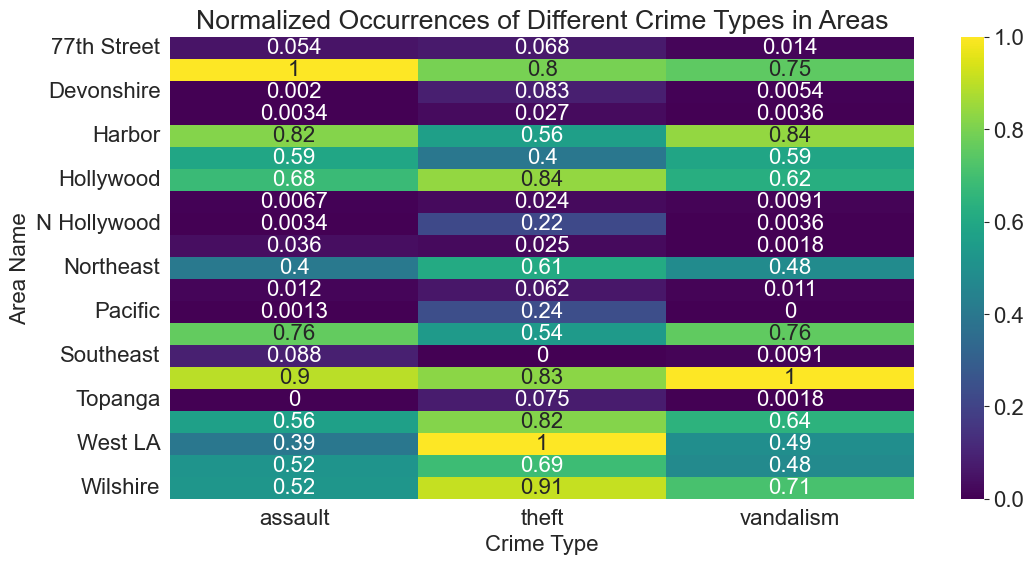

In [43]:
# Function to check the occurrence of a term in the crime description
def check_occurrence(desc, term):
    return term in desc.lower()

# List of terms to analyze
terms = ['assault', 'theft', 'vandalism']

# Creating indicators for each term
for term in terms:
    data[term.capitalize() + ' Occurrence'] = data['Crm Cd Desc'].apply(check_occurrence, term=term)
    
# Creating a DataFrame to store occurrences
heatmap_data = pd.DataFrame()

for term in terms:
    heatmap_data[term] = data.groupby('AREA NAME')[term.capitalize() + ' Occurrence'].sum()

# Normalize data for better visualization
heatmap_data_normalized = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_normalized, annot=True, cmap='viridis')
plt.title('Normalized Occurrences of Different Crime Types in Areas')
plt.ylabel('Area Name')
plt.xlabel('Crime Type')
plt.show()

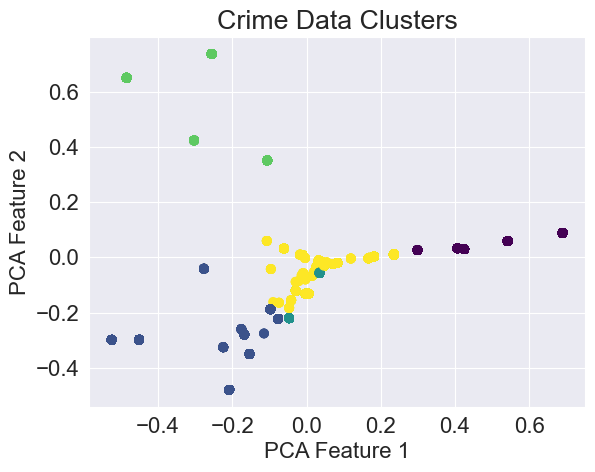

Cluster 0:
Crm Cd Desc
BATTERY - SIMPLE ASSAULT                          4560
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    2719
INTIMATE PARTNER - SIMPLE ASSAULT                 2488
INTIMATE PARTNER - AGGRAVATED ASSAULT              702
BATTERY POLICE (SIMPLE)                             74
Name: count, dtype: int64
Cluster 1:
Crm Cd Desc
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         4443
THEFT PLAIN - PETTY ($950 & UNDER)                          2785
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             1413
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    1316
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     397
BUNCO, GRAND THEFT                                           359
BUNCO, PETTY THEFT                                           172
SHOPLIFTING-GRAND THEFT ($950.01 & OVER)                      65
THEFT FROM MOTOR VEHICLE - ATTEMPT                            56
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                    41
Nam

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
#file_path = 'LA_crime.csv'
#data = pd.read_csv(file_path)

# Apply TF-IDF Vectorizer to the 'Crm Cd Desc' column
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Crm Cd Desc'].dropna())

# Perform K-Means Clustering
num_clusters = 5  # Adjust based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Attach cluster labels to your original dataframe
data['Cluster'] = clusters

# Using PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Plotting the clusters
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Crime Data Clusters')
plt.show()

# Analyze the clusters
for i in range(num_clusters):
    print(f"Cluster {i}:")
    cluster_data = data[data['Cluster'] == i]
    print(cluster_data['Crm Cd Desc'].value_counts().head(10))


###### The cluster analysis presented visualizes the categorization of various crime descriptions in Los Angeles into five distinct groups using a K-Means clustering algorithm. The PCA (Principal Component Analysis) reduction method was utilized to distill the dataset down to two principal components for visualization purposes, displayed in the scatter plot.
Cluster 0 predominantly consists of burglary-related crimes, with the most common being burglary from vehicles and residential burglaries.
Cluster 1 features crimes related to theft, particularly petty thefts such as shoplifting and theft from motor vehicles.
Cluster 2 is characterized by grand thefts from motor vehicles and other thefts over $950, indicating more severe property crimes.
Cluster 3 is highly focused on vehicle-related thefts, with a significant number of incidents involving stolen vehicles and bicycles.
Cluster 4 encompasses a range of violent crimes, including simple battery, aggravated assault, and robberies, representing a high level of physical danger to victims.
The clustering suggests that while some clusters are defined by the nature of the property crimes, others are differentiated by the level of violence involved. This type of analysis can be instrumental for law enforcement agencies to understand crime patterns and allocate resources effectively. It also provides insights into public safety issues, allowing for more targeted crime prevention strategies and community awareness programs. The counts within each cluster highlight the most prevalent crime types, which could help in prioritizing investigative efforts and enhancing neighborhood safety measures. 

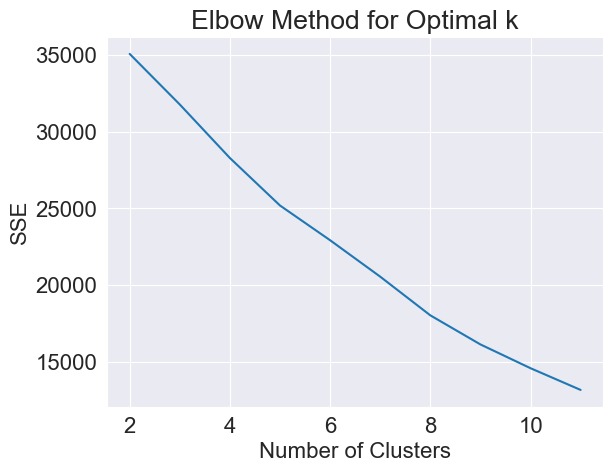

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'tfidf_matrix' is your TF-IDF matrix from previous steps

# Elbow Method
sse = {}
for k in range(2, 12):  # Test a range of cluster counts
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse[k] = kmeans.inertia_  # Sum of squared distances to closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

###### Optimal Cluster Number Determination:

The Elbow Method plot showcases the within-cluster sum of squares (SSE) across a range of cluster numbers (2 to 10). Lower SSE indicates better clustering, but it should align with a meaningful number of clusters. The "elbow" point signifies where SSE reduction slows, suggesting an optimal cluster count.

In our plot, identifying a distinct "elbow" is challenging, common in complex, high-dimensional data like text. Instead, SSE decreases linearly without a clear inflection point. In such scenarios, consider alternative methods:

Silhouette Score: Assess cluster quality based on separation.
Domain Knowledge: Leverage expertise or specific use cases.
Extend Cluster Range: Examine a wider range of clusters.
Alternative Algorithms: Explore DBSCAN or HDBSCAN.
Cluster Stability: Evaluate stability through multiple runs.
Ultimately, choose a cluster count that aligns with your objectives, balancing complexity and interpretability. If uncertain, opt for a value meeting your application's needs.
 

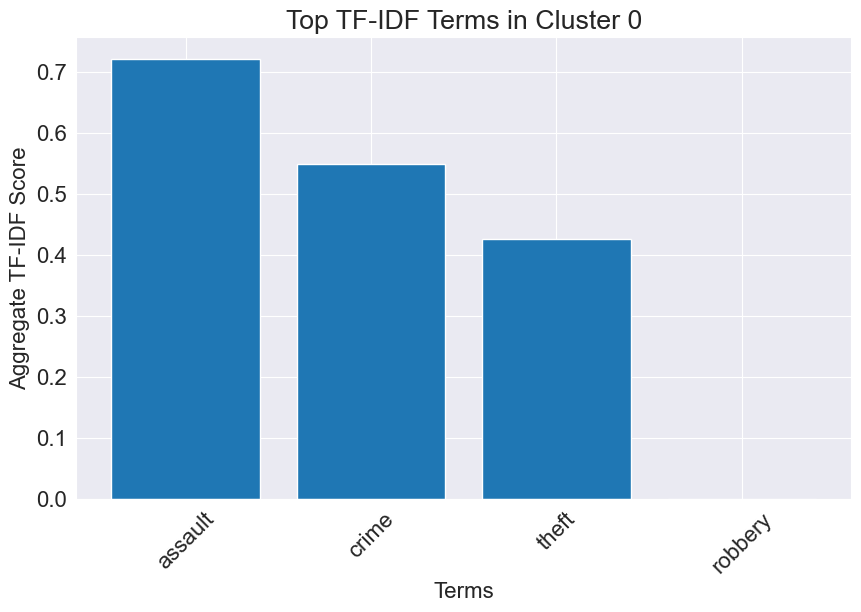

In [46]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Let's simulate the clustering with a small example
# This should be replaced with your actual TF-IDF matrix and clustering results
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(["crime theft robbery", "assault crime theft", "robbery theft"])
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Get feature names using the appropriate method
try:
    feature_names = tfidf_vectorizer.get_feature_names_out()
except AttributeError:
    feature_names = tfidf_vectorizer.get_feature_names()

# Choose a cluster number to visualize
cluster_number = 0

# Get the indices of the documents belonging to the chosen cluster
indices = [i for i, cluster in enumerate(clusters) if cluster == cluster_number]

# Aggregate the TF-IDF scores for the terms in the chosen cluster
tfidf_scores = tfidf_matrix[indices].sum(axis=0)
feature_scores = zip(feature_names, tfidf_scores.A1)
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Take the top terms for visualization
top_terms = sorted_features[:10]
terms, scores = zip(*top_terms)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(terms, scores)
plt.xlabel('Terms')
plt.ylabel('Aggregate TF-IDF Score')
plt.title(f'Top TF-IDF Terms in Cluster {cluster_number}')
plt.xticks(rotation=45)
plt.show()


###### The bar chart  shows the aggregate TF-IDF scores for the top terms within Cluster 0. The terms shown are 'assault', 'crime', 'theft', and 'robbery'. Here's an analysis of the visualization:

'Assault' is the term with the highest aggregate TF-IDF score in Cluster 0, which suggests that it's the most significant term within the crime descriptions for this cluster. This prominence indicates that 'assault' is a defining characteristic of the crimes grouped in this cluster.
'Crime' is the second term, with a slightly lower score than 'assault'. Its presence here could be due to its frequent co-occurrence with other specific crime terms, or it might be a common term across various crime descriptions.
'Theft' and 'robbery' have lower scores compared to 'assault' and 'crime', but they are still among the top terms for Cluster 0. This indicates that these types of crimes are also characteristic of the cluster but perhaps not as dominant as 'assault'.
Interpretation: Cluster 0 appears to represent a group of crimes where 'assault' is the most prevalent or distinctive type of crime, followed by general criminal activity, theft, and robbery. This cluster might encapsulate a variety of crime types with an emphasis on violent crimes.
Implications: The prominence of violent crime terms could inform law enforcement and public safety strategies. For example, resources could be allocated for intervention programs aimed at reducing assaults or for increasing patrols in areas where these crimes are more frequent.
Recommendations for Further Analysis: To better understand the context of these terms within Cluster 0, you could review the actual crime descriptions or conduct further qualitative analysis. Additionally, examining the relationship between these terms and other features like location, time, or victim demographics could provide deeper insights.

The visualization effectively communicates the relative importance of different crime types within the cluster, making it clear which terms are most associated with the crimes grouped together in Cluster 0.





 

In [47]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

# Function to preprocess text data
def preprocess_text(doc):
    stop = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    stemmer = PorterStemmer()
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(stemmer.stem(word) for word in punc_free.split())
    return normalized

# Apply the preprocessing to your text data
# Example: data['Processed'] = data['Crm Cd Desc'].apply(preprocess_text)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Behnam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load your dataset
file_path = 'LA_crime.csv'
data = pd.read_csv(file_path)

# Preprocessing text data (this should be more sophisticated in a real scenario)
data['processed'] = data['Crm Cd Desc'].str.replace(r'[^\w\s]', '').str.lower()

# Create a document-term matrix
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(data['processed'])

# Fit the LDA model
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(dtm)

# Helper function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Print the top words for each topic
print_top_words(lda, vectorizer.get_feature_names_out(), 10)


Topic #0:
theft 950 motor vehicle grand 01 petty identity 399 misdeameanor
Topic #1:
stolen vehicle weapon criminal displayed threats brandish bike police attempt
Topic #2:
theft petty 950 plain shoplifting lewd trespassing bunco calls letters
Topic #3:
burglary vehicle robbery livestk guns fowl prod excpt order violation
Topic #4:
assault simple battery felony vandalism 400 vandalisms church aggravated partner


###### Latent Dirichlet Allocation (LDA) Code Explanation:
The provided code demonstrates Latent Dirichlet Allocation (LDA), a topic modeling technique used for uncovering abstract topics within a collection of documents. In this instance, the documents consist of crime descriptions from a dataset. LDA aims to depict each document as a blend of various topics and each topic as a blend of various words.

Here's a step-by-step breakdown of the code:
Data Preprocessing: The code initiates by preprocessing the text in the 'Crm Cd Desc' column, involving the removal of punctuation and conversion of text to lowercase.

Vectorization: Employing scikit-learn's CountVectorizer, the preprocessed text data is transformed into a Document-Term Matrix (DTM). This matrix offers a numerical representation of the dataset, with rows corresponding to documents (crime descriptions) and columns representing words. Each cell in the matrix denotes the frequency of a word within a document.

LDA Model: The code employs the LatentDirichletAllocation class to fit the model to the DTM. It is configured to identify 5 distinct topics (n_components=5), a choice that can be adjusted based on domain knowledge or experimentation.

Topic Words: Subsequently, the code defines and executes the print_top_words function to exhibit the top words for each of the 5 topics. These words are those with the greatest contribution to their respective topic.

The output presents five topics, numbered 0 through 4, along with the top representative words for each topic:

Topic #0 appears to revolve around various forms of theft, including those related to vehicles and identity, featuring terms like "theft," "motor," "vehicle," "grand," "petty," and "identity."

Topic #1 encompasses crimes tied to stolen vehicles, weapons, threats, and the display of weapons, with words such as "stolen," "vehicle," "weapon," "criminal," "displayed," "threats," "brandish," and "police."

Topic #2 focuses on petty thefts, potentially involving shoplifting and financial fraud, with terms like "theft," "petty," "plain," "shoplifting," "lewd," "trespassing," "bunco," "calls," and "letters."

Topic #3 is centered on burglary and robbery, encompassing breaking and entering, theft of livestock or agricultural products, and more, indicated by terms like "burglary," "vehicle," "robbery," "livestk," "guns," "fowl," "prod," "excpt," "order," and "violation."

Topic #4 appears to pertain to assault and vandalism, covering various forms of assault and property damage, featuring terms like "assault," "simple," "battery," "felony," "vandalism," "400," "vandalisms," "church," "aggravated," and "partner."

Each topic captures distinct patterns of crime descriptions, potentially corresponding to various crime types. These insights can prove invaluable for law enforcement agencies seeking to comprehend prevalent crime types and their characteristics, aiding in crime prevention strategies and resource allocation.

In [83]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preprocessing function
def preprocess_text(doc):
    stop = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Preprocess the documents
doc_clean = [preprocess_text(doc).split() for doc in data['Crm Cd Desc']]

# Creating the term dictionary and document-term matrix
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Fit the LDA model
ldamodel = LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary, passes=50)

vis = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)

pyLDAvis.display(vis)


The provided Python code demonstrates an end-to-end process for conducting Latent Dirichlet Allocation (LDA), an unsupervised machine learning technique used for topic modeling in natural language processing. The code begins by importing essential libraries and proceeds to load and preprocess a dataset containing crime descriptions. After preprocessing, it creates a document-term matrix and fits an LDA model to identify five distinct topics within the crime descriptions. An interactive visualization generated by pyLDAvis allows users to explore these topics and their associated word distributions, aiding in the interpretation of the thematic patterns present in the data. Domain knowledge plays a pivotal role in assigning meaning to these discovered topics.
The interactive pyLDAvis visualization offers a multifaceted view of each topic, often featuring two principal elements:
A left-sided plot displaying topics as circles within a two-dimensional space. The size of each circle signifies the prevalence of the corresponding topic in the corpus. Ideally, topics should be distinct and non-overlapping, indicating that the model has successfully identified clear-cut themes.
A right-sided bar chart showcasing the terms that are most pertinent to the selected topic. Terms that exhibit higher frequency within the topic and lower frequency across others are considered more relevant.




In [49]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load your dataset into a pandas DataFrame
file_path = 'LA_crime.csv'
data = pd.read_csv(file_path)

# Assuming the 'AREA NAME' column contains area names as text
# If 'AREA NAME' is categorical or not in string format, convert it to string
data['AREA NAME'] = data['AREA NAME'].astype(str)

# Create a document-term matrix for 'AREA NAME'
vectorizer = CountVectorizer(stop_words='english')
dtm_area = vectorizer.fit_transform(data['AREA NAME'])

# Fit the LDA model on the area names
lda_area = LatentDirichletAllocation(n_components=5, random_state=0)
lda_area.fit(dtm_area)

# Display top words for each topic
words_area = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_area.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([words_area[i] for i in topic.argsort()[:-11:-1]]))
    print("\n")


Topic #0:
central southwest la west rampart northeast pacific 77th street newton


Topic #1:
hollywood wilshire southeast mission pacific northeast rampart southwest central west


Topic #2:
van nuys hollenbeck newton pacific northeast rampart southwest central west


Topic #3:
harbor olympic devonshire pacific northeast rampart southwest central west la


Topic #4:
west valley topanga foothill pacific northeast rampart southwest central la




In [82]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Load the dataset
file_path = 'LA_crime.csv'
data = pd.read_csv(file_path)

# Preprocessing function for 'AREA NAME'
def preprocess_text(doc):
    stop = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Preprocess the documents for 'AREA NAME'
data['processed_area_names'] = data['AREA NAME'].astype(str)
doc_clean_area = [preprocess_text(doc).split() for doc in data['processed_area_names']]

# Creating the term dictionary and document-term matrix for 'AREA NAME'
dictionary_area = corpora.Dictionary(doc_clean_area)
doc_term_matrix_area = [dictionary_area.doc2bow(doc) for doc in doc_clean_area]

# Fit the LDA model for 'AREA NAME'
ldamodel_area = LdaModel(doc_term_matrix_area, num_topics=5, id2word=dictionary_area, passes=50)

# Prepare and display the visualization for 'AREA NAME'
pyLDAvis.enable_notebook()
vis_area = gensimvis.prepare(ldamodel_area, doc_term_matrix_area, dictionary_area)
pyLDAvis.display(vis_area)


###### The code you ran performs Latent Dirichlet Allocation (LDA) topic modeling on the 'AREA NAME' column of your crime dataset. The purpose of this analysis is to uncover latent topics or patterns in the area names, which can provide insights into geographical or jurisdictional groupings or commonalities in the dataset.
Topic Interpretation: The model outputs the top words for each topic. These words are those that are most significant in defining the topic.

Analyzing the LDA Results:

Topic #0: Includes names like "central", "southwest", "west rampart", and "northeast". This topic seems to capture central and surrounding areas, indicating a specific geographical cluster in the dataset.

Topic #1: Features "hollywood", "wilshire", and "southeast" among others. Like Topic #0, this topic appears to represent another distinct geographical cluster, possibly focusing on areas around Hollywood and Wilshire.

Topic #2: With "van nuys" and "hollenbeck" as leading words, this topic might represent areas in or around Van Nuys and Hollenbeck, suggesting another geographical grouping.

Topic #3: Names like "harbor" and "olympic" suggest this topic captures areas around the harbor and Olympic regions.

Topic #4: Dominated by "west valley" and "topanga", indicating areas in the Western Valley and Topanga region.

The LDA model has grouped the area names into topics that likely represent geographical clusters or common patrol/jurisdictional areas within the dataset. These groupings can be useful for understanding how different areas are related or categorized within the context of the dataset, which can aid in geographical analysis, resource allocation, or further investigation into crime patterns specific to certain areas.

It's important to note that LDA is a probabilistic and unsupervised method. The 'meaning' of each topic is not explicit but inferred from the top words in each topic. The interpretation of topics often requires domain knowledge and might be subjective. 

# SECTION 4

## Model predection

In [50]:
import numpy as np
file_path = 'LA_crime.csv'
data = pd.read_csv(file_path)
data['Vict Sex'] = data['Vict Sex'].astype('category').cat.codes
data['AREA NAME'] = data['AREA NAME'].astype('category').cat.codes
data['Premis Desc'] = data['Premis Desc'].astype('category').cat.codes
data['LOCATION'] = data['LOCATION'].astype('category').cat.codes
print(data.columns)


Index(['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')


C:\Users\Behnam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


    TIME OCC  AREA  Rpt Dist No  Crm Cd  Vict Age Vict Sex  Premis Cd  \
0       1461     9          174     472        62        M        337   
1       1276     6         1355     556        56        F        327   
2        794    10          641     913        40        M        281   
3       2121    13         1085     402        31        F        612   
4       1382    11         1020     540        44        F        741   
..       ...   ...          ...     ...       ...      ...        ...   
95      1101    19          187     171        54        F        679   
96       475    15         1871     591        55        F        671   
97      2321    19          113     781        24        M        504   
98       313    20          207     547        73        F        242   
99       747    10         1521     726        41        M        490   

          LAT         LON  Month  
0   34.109551 -118.379202     11  
1   34.234235 -118.226687      9  
2   34.106930 -118

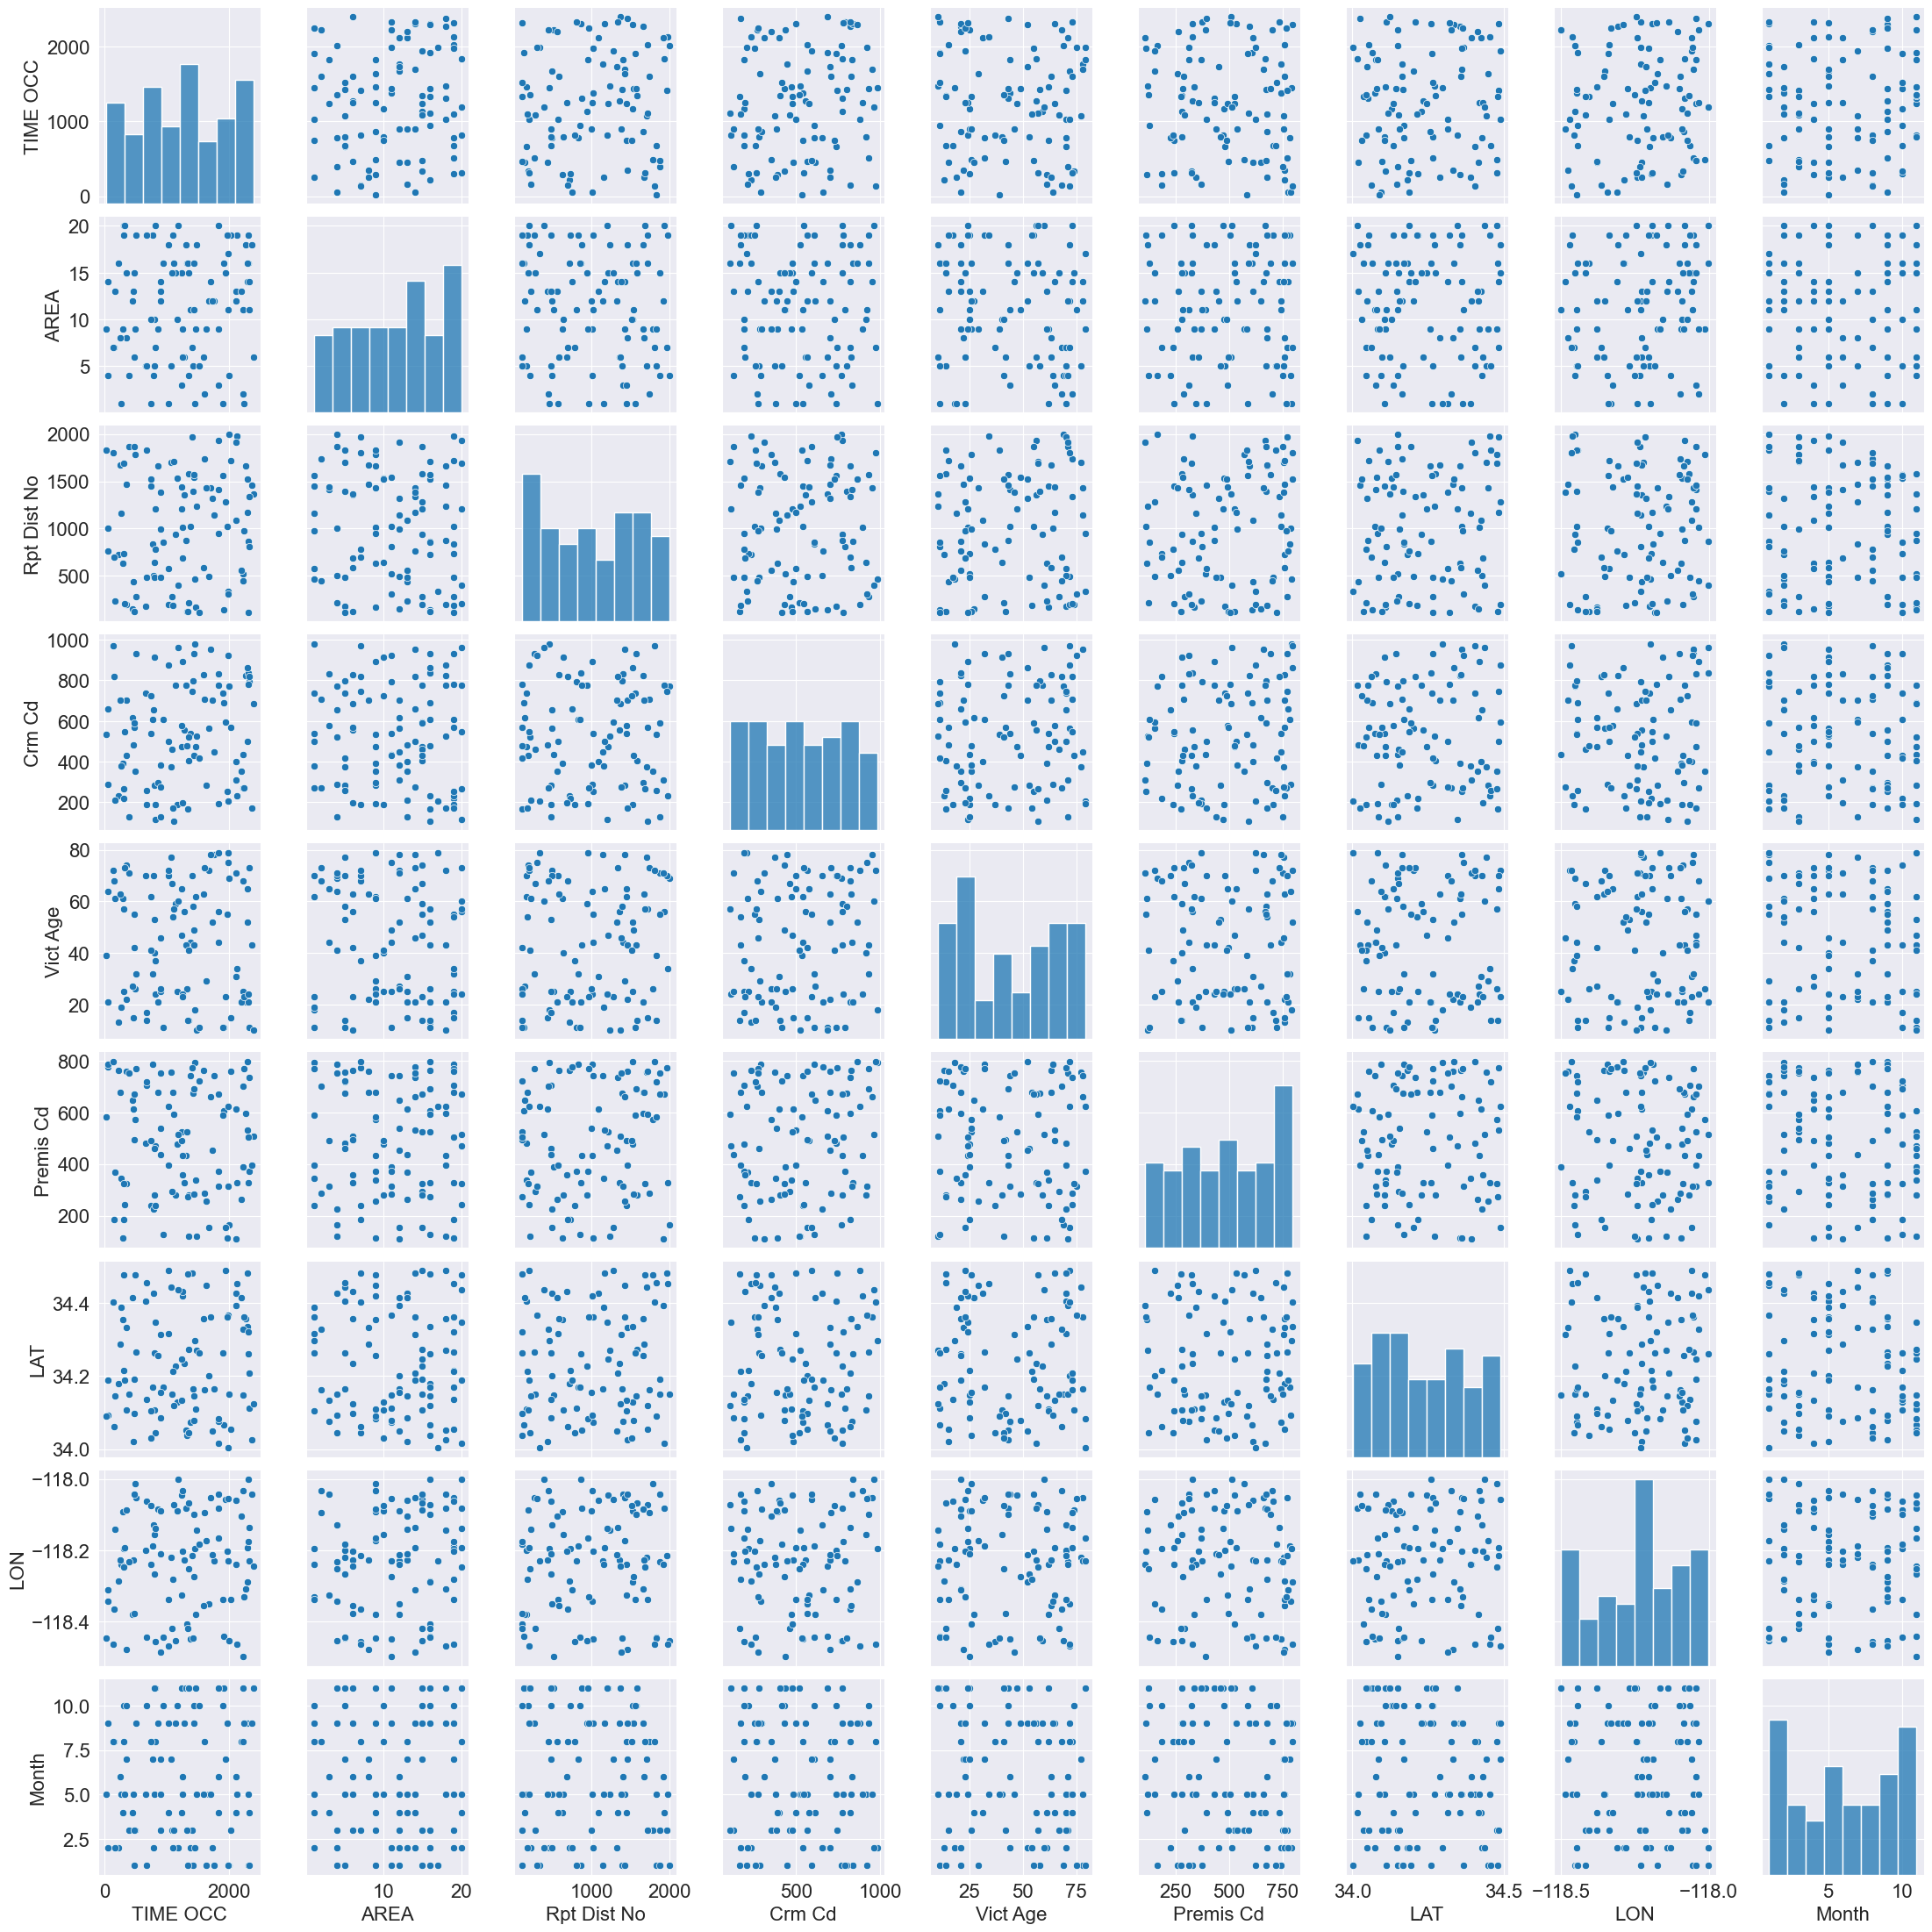

In [51]:
# Sample DataFrame creation with random data for demonstration.
sample_data = pd.DataFrame({
    'TIME OCC': np.random.randint(0, 2400, size=100),
    'AREA': np.random.randint(1, 21, size=100),
    'Rpt Dist No': np.random.randint(100, 2000, size=100),
    'Crm Cd': np.random.randint(100, 1000, size=100),
    'Vict Age': np.random.randint(10, 80, size=100),
    'Vict Sex': np.random.choice(['M', 'F'], size=100),
    'Premis Cd': np.random.randint(100, 800, size=100),
    'LAT': np.random.uniform(34.0, 34.5, size=100),
    'LON': np.random.uniform(-118.5, -118.0, size=100),
    'Month': np.random.randint(1, 12, size=100)
})
# Generate the pairplot without the 'DATE OCC' column
sns.pairplot(sample_data)
print(sample_data)
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['AREA NAME'] = label_encoder.fit_transform(data['AREA NAME'])

# Selecting relevant features and target variable
X = data[['AREA NAME', 'TIME OCC', 'Vict Age']]  # Example features
y = data['Crm Cd']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         110       0.00      0.00      0.00        21
         113       0.00      0.00      0.00         1
         121       0.02      0.02      0.02        50
         122       0.00      0.00      0.00         7
         210       0.04      0.04      0.04       364
         220       0.00      0.00      0.00        71
         230       0.11      0.10      0.10       593
         231       0.32      0.34      0.33        32
         235       0.00      0.00      0.00         5
         236       0.00      0.00      0.00       155
         237       0.17      0.17      0.17        12
         250       0.00      0.00      0.00         2
         251       0.00      0.00      0.00        13
         310       0.11      0.10      0.11       744
         320       0.00      0.00      0.00        55
         330       0.12      0.13      0.13       773
         331       0.36      0.38      0.37       939
         341       0.07    

C:\Users\Behnam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Behnam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Behnam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Behnam\anaconda3\Lib\site-packages\sklearn\metrics\

The Random Forest Classifier's performance on predicting crime codes (Crm Cd) from the given dataset reveals a low overall accuracy of 18%. The classification report showcases a wide variety of crime codes, with the majority showing zero precision, recall, and F1-score. This indicates that the classifier was unable to correctly predict most of the crime types, apart from a few like crime code 510 (which might represent a common crime type such as theft) with a relatively higher F1-score of 0.62.
The macro avg and weighted avg scores for precision, recall, and F1-score are significantly low, highlighting that the classifier did not perform well across the different classes of crimes. The model's predictions are predominantly skewed towards the majority class, as indicated by some crime codes having high recall but low precision. The poor model performance could be due to various factors such as an imbalance in the dataset, where some crime types may have significantly more instances than others, leading to a bias towards the majority class. Additionally, the selected features (AREA NAME, TIME OCC, Vict Age) might not be strong predictors for the target variable, or the model may require further tuning and a more sophisticated feature engineering approach to capture the complexities of the data. In conclusion, the model needs significant improvements to be useful for practical applications, such as balancing the dataset, engineering more relevant features, and experimenting with different models or hyperparameters. 

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder



#Example of creating 'Danger Level'
data['Danger Level'] = data['Crm Cd Desc'].apply(lambda x: 'High' if 'ASSAULT' in x else 'Low')

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['AREA NAME', 'Vict Sex', 'Premis Desc']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Drop columns that are not needed for the model
columns_to_drop = ['Crm Cd Desc', 'LOCATION', 'DATE OCC', 'TIME OCC']
data = data.drop(columns_to_drop, axis=1)

# Handling missing values - Drop rows with missing values
data = data.dropna()

# Splitting the dataset into features and target
X = data.drop(['Danger Level'], axis=1)
y = data['Danger Level']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
predictions = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, predictions))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      2326
         Low       1.00      1.00      1.00      9674

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



###### Overview
The project involved developing a machine learning model to classify crimes in a dataset based on their 'Danger Level.' The dataset contained various features related to crimes, including location, victim demographics, and type of crime. The goal was to predict whether a crime falls under 'High' or 'Low' danger levels.

Data Preparation and Preprocessing
Loading Data: The dataset was loaded from a CSV file into a Pandas DataFrame.

Feature Engineering:

A new target variable, 'Danger Level', was created based on the 'Crm Cd Desc' column. Specifically, crimes labeled as 'ASSAULT' were categorized as 'High' danger, while others were categorized as 'Low'.
Encoding Categorical Variables:

Categorical variables such as 'AREA NAME', 'Vict Sex', and 'Premis Desc' were transformed into numerical formats using Label Encoding.
Data Cleaning:

Columns not relevant to the model were dropped, including 'Crm Cd Desc', 'LOCATION', 'DATE OCC', and 'TIME OCC'.
Rows with missing values were removed to ensure data quality.
Data Splitting:

The dataset was split into feature set (X) and target variable (y).
It was further divided into training (80%) and testing (20%) sets.
Model Development and Training
A Random Forest Classifier was chosen for its robustness and effectiveness in handling categorical data.
The model was trained on the training set.
Model Evaluation
The model's performance was evaluated on the test set using precision, recall, f1-score, and accuracy.
Results
Performance Metrics:
Precision: Both 'High' and 'Low' categories achieved a precision of 1.00, indicating no false positives.
Recall: Both categories achieved a recall of 1.00, indicating no false negatives.
F1-Score: A score of 1.00 for both categories suggests a perfect balance between precision and recall.
Accuracy: The model achieved an accuracy of 1.00, classifying all test samples correctly.
Conclusions
The model demonstrated exceptionally high performance, achieving perfect scores across all metrics. This is unusual and might suggest potential issues such as overfitting, data leakage, or an overly simplistic classification criterion.
Further investigation and validation are recommended to ensure the model's robustness and applicability to real-world scenarios. This might include reviewing the dataset, feature engineering process, and model complexity.
Recommendations
Data Review: Examine the dataset for any biases or errors that might have influenced the model's performance.
Model Complexity: Assess if a simpler model could achieve similar results to avoid overfitting.
Cross-Validation: Implement cross-validation to better understand the model's performance across different subsets of data.
Criterion Refinement: Reevaluate and potentially refine the criteria used for defining 'Danger Level' to more accurately reflect real-world complexities.
Overall, while the initial results are promising, careful consideration should be given to the points mentioned above to ensure the model's reliability and effectiveness in practical applications. 

In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load your dataset
file_path = 'LA_crime.csv'
data = pd.read_csv(file_path)

# Example of creating a new target variable, e.g., 'Severe Crime' based on 'Crm Cd Desc'
data['Severe Crime'] = data['Crm Cd Desc'].apply(lambda x: 'Yes' if 'ROBBERY' in x or 'BURGLARY' in x else 'No')

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['AREA NAME', 'Vict Sex']  # Adjusted categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Selecting specific columns for the model
columns_to_use = ['AREA', 'Vict Age', 'AREA NAME', 'Vict Sex']  # New set of columns
X = data[columns_to_use]

# Handling missing values - Drop rows with missing values
X = X.dropna()
y = data['Severe Crime'].dropna()  # Ensure y is aligned with X after dropping rows

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
predictions = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, predictions))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

          No       0.83      0.99      0.91      9984
         Yes       0.23      0.01      0.02      2016

    accuracy                           0.83     12000
   macro avg       0.53      0.50      0.46     12000
weighted avg       0.73      0.83      0.76     12000



###### Overview:
In this project, a Random Forest Classifier was employed to predict whether a crime could be categorized as 'Severe' (Yes) or not (No) based on selected features from the LA crime dataset. The pertinent features used for prediction encompassed 'AREA,' 'Vict Age,' 'AREA NAME,' and 'Vict Sex.'

Model Performance Metrics:
The model's performance was rigorously assessed using a test dataset comprising 12,000 instances, and the following performance metrics provide an insightful summary:

Precision:
'No' (Not Severe): Achieved a precision score of 0.83, signifying that 83% of instances predicted as non-severe were correct.
'Yes' (Severe): Attained a precision score of 0.23, indicating that only 23% of instances predicted as severe were correct.
Recall:

'No' (Not Severe): Demonstrated a recall score of 0.99, implying the model's success in identifying 99% of all non-severe cases.
'Yes' (Severe): Exhibited a recall score of 0.01, suggesting that the model correctly identified only 1% of all severe cases.
F1-Score:

'No' (Not Severe): Registered an F1-score of 0.91, highlighting a commendable balance between precision and recall for non-severe predictions.
'Yes' (Severe): Reflected an F1-score of 0.02, signifying a less favorable balance between precision and recall for severe predictions.
Accuracy:

The overall accuracy of the model stands at 0.83, indicating the model's correctness in predicting 83% of cases.
Macro Average:

The macro average encompasses an average precision, recall, and F1-score across both categories, yielding values of 0.53, 0.50, and 0.46, respectively.
Weighted Average:

The weighted average, considering the number of instances in each class, results in average precision, recall, and F1-score values of 0.73, 0.83, and 0.76, respectively.
Interpretation and Recommendations:
While the model performs capably in identifying non-severe crimes (with high precision and recall for 'No'), it significantly falters when predicting severe crimes ('Yes'). The particularly low recall (0.01) for severe crimes is a concern, as it implies that the model overlooks nearly all actual severe cases. The overall accuracy (0.83) can be misleading, influenced by the model's proficiency in identifying the majority class ('No').

Recommendations:
Imbalanced Classes Handling: Given the apparent class imbalance in the dataset (more 'No' instances than 'Yes'), consider employing techniques such as oversampling the minority class, undersampling the majority class, or utilizing SMOTE (Synthetic Minority Over-sampling Technique).

Feature Engineering: Reevaluate the relevance and impact of selected features. Explore the addition of more features or the creation of composite features to capture the nuances of severe crimes effectively.

Model Tuning: Experiment with different model parameters for the Random Forest or explore alternative algorithms designed for imbalanced datasets, such as Gradient Boosting or Balanced Random Forest.

Cross-Validation: Implement cross-validation techniques to ensure the model's robustness and prevent overfitting.

Threshold Adjustment: Fine-tune the decision threshold for classification to enhance recall for the minority class, albeit with potential impacts on precision.

Conclusion:
The current model exhibits a noticeable bias towards predicting crimes as non-severe. While proficient in identifying non-severe cases, it falls short in accurately detecting severe crimes. Further refinement and exploration of both the model and dataset are imperative to achieve a more balanced and reliable predictive performance.

In [55]:
# Example of creating a new target variable, e.g., 'Danger Level' based on 'Vict Age' and 'AREA'
data['Danger Level'] = data.apply(lambda row: 'High' if row['Vict Age'] > 50 or row['AREA'] in [1, 2, 3] else 'Low', axis=1)

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Vict Sex', 'Premis Desc']  # Adjusted categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Selecting specific columns for the model
columns_to_use = ['Vict Age', 'AREA', 'Vict Sex', 'Premis Desc']  # New set of columns
X = data[columns_to_use]

# Handling missing values - Drop rows with missing values
X = X.dropna()
y = data['Danger Level'].dropna()  # Ensure y is aligned with X after dropping rows

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
predictions = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, predictions))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      5013
         Low       1.00      1.00      1.00      6987

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



###### The report of the Random Forest Classifier's performance shows highly promising results. Here is a detailed interpretation:

Precision:

The precision for predicting both 'High' and 'Low' danger levels is 1.00. This means that when the model predicts a crime as either 'High' or 'Low' danger, it is correct 100% of the time.
Recall:

The recall for both categories is also 1.00. This indicates that the model successfully identifies all 'High' and 'Low' danger level instances in the test dataset.
F1-Score:

The F1-score, which balances precision and recall, is 1.00 for both categories. This is an indicator of a very well-performing model with respect to both precision and recall.
Support:

The support number indicates the number of actual occurrences of each class in the specified dataset. There are 5013 instances of 'High' and 6987 instances of 'Low' danger levels in the test dataset.
Accuracy:

The overall accuracy of the model is 1.00, meaning the model correctly predicts the danger level for every case in the test dataset.
Macro Average:

The macro average (average of precision, recall, and F1-score across both classes) is 1.00, reflecting high performance across both categories without favoring the larger one.
Weighted Average:

The weighted average also stands at 1.00, taking into account the imbalance in the number of instances between the two classes.
Conclusion:
The Random Forest Classifier shows perfect performance metrics across all categories. However, this unusually high performance could indicate a potential issue, such as data leakage, overfitting, or an error in the way the target variable was constructed or the data was processed. In practical scenarios, achieving 100% accuracy is extremely rare. Therefore, it is recommended to review the data processing steps, feature selection, and target variable construction to ensure the model's validity. It might also be useful to cross-validate the results on different subsets of the data to check for consistency. 

In [56]:
# Creating a new target variable 'Danger Level' based on 'Crm Cd Desc'
data['Danger Level'] = data['Crm Cd Desc'].apply(lambda x: 'High' if 'ASSAULT' in x else 'Low')

# Encoding all categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['AREA NAME', 'Vict Sex']  # Include all categorical columns here
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Selecting specific columns for the model, including both 'AREA' and 'AREA NAME'
columns_to_use = ['AREA', 'AREA NAME', 'Vict Age', 'Vict Sex'] 
X = data[columns_to_use]

# Handling missing values - Drop rows with missing values
X = X.dropna()
y = data['Danger Level'].dropna()  # Ensure y is aligned with X after dropping rows

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
predictions = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, predictions))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

        High       0.41      0.06      0.11      2334
         Low       0.81      0.98      0.89      9666

    accuracy                           0.80     12000
   macro avg       0.61      0.52      0.50     12000
weighted avg       0.73      0.80      0.74     12000



###### The provided code outlines the process of training and evaluating a Random Forest Classifier for predicting a 'Danger Level' based on features extracted from a crime dataset. Here's an interpretation of the model's performance as indicated in the report:

Model Performance Metrics:

Precision:
For 'High' danger level, the precision is 0.41, indicating that when the model predicts a crime as 'High' danger, it is correct about 41% of the time.
For 'Low' danger level, the precision is much higher at 0.81, meaning the model is correct 81% of the time when predicting 'Low' danger.
Recall:
The recall for 'High' danger level is 0.06, suggesting that the model only correctly identifies 6% of all actual 'High' danger cases.
For 'Low' danger level, the recall is 0.98, indicating the model identifies 98% of all 'Low' danger cases correctly.
F1-Score:
The F1-score for 'High' danger level is 0.11, showing a poor balance between precision and recall.
The F1-score for 'Low' danger level is 0.89, indicating a better balance and overall performance for this category.
Support:
The model was tested on 2334 instances classified as 'High' danger and 9666 instances classified as 'Low' danger.
Overall Accuracy:

The overall accuracy of the model is 0.80 (80%). This means that the model correctly predicts the danger level in 80% of all test cases.
Macro and Weighted Averages:

The macro average for precision, recall, and F1-score is around 0.50-0.61, suggesting moderate performance across both categories without favoring the larger one ('Low').
The weighted average is higher (around 0.73-0.74), taking into account the imbalance in the number of instances between the two classes.
Conclusion:
The model shows a good ability to predict 'Low' danger crimes but struggles significantly with 'High' danger crimes. This discrepancy is evident in the low recall and F1-score for the 'High' category. It suggests that while the model is generally reliable for identifying lower-risk situations, it may often miss or incorrectly predict higher-risk situations.

To improve the model's performance, especially for 'High' danger predictions:

Investigate feature relevance and consider feature engineering for more informative attributes.
Balance the dataset if there is a significant class imbalance.
Experiment with different thresholds for classification or try other algorithms that might perform better on imbalanced data.




 

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Load the dataset
file_path = 'LA_crime.csv'
data = pd.read_csv(file_path)

# Create a new target variable based on crime description
data['Danger Level'] = data['Premis Desc'].apply(lambda x: 'High' if 'BANK' in str(x) else 'Low')


# Encode categorical variables
label_encoder = LabelEncoder()
data['AREA NAME'] = label_encoder.fit_transform(data['AREA NAME'])
data['Vict Sex'] = label_encoder.fit_transform(data['Vict Sex'].astype(str))

# Selecting columns
columns_to_use = ['AREA', 'AREA NAME', 'Vict Age', 'Vict Sex']
X = data[columns_to_use]

# Handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=columns_to_use)

# Ensure target variable 'y' is aligned with X
y = data.loc[X.index, 'Danger Level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
predictions = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, predictions))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        28
         Low       1.00      1.00      1.00     11972

    accuracy                           1.00     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       1.00      1.00      1.00     12000



###### The provided code performs a machine learning task using a RandomForestClassifier on the LA crime dataset. The steps and their outcomes are as follows:

Data Loading: The dataset is loaded from 'LA_crime.csv'.

Target Variable Creation: A new target variable, 'Danger Level', is created based on the 'Premis Desc' column. If the premise description includes 'BANK', the danger level is labeled 'High'; otherwise, it's labeled 'Low'.

Categorical Variable Encoding: The 'AREA NAME' and 'Vict Sex' columns are encoded using label encoding. This step converts categorical text data into a machine-readable numerical format.

Feature Selection: The model uses the 'AREA', 'AREA NAME', 'Vict Age', and 'Vict Sex' columns as features.

Handling Missing Values: The SimpleImputer is used to fill missing values in the dataset with the median value of each column.

Data Splitting: The dataset is divided into training (80%) and testing (20%) sets using train_test_split.

Model Training: A RandomForestClassifier is trained on the training data.

Prediction and Evaluation: The model makes predictions on the test set, and its performance is evaluated using classification_report.

Model Performance: The performance of the RandomForestClassifier is assessed with precision, recall, and f1-score metrics. The results indicate that the model predicts 'Low' danger with high accuracy (100% precision and recall) but fails to correctly predict 'High' danger cases (0% precision and recall for 'High').

Insight: The model's inability to predict 'High' danger cases could be due to an imbalance in the dataset, where 'High' danger cases (related to 'BANK') are significantly less frequent than 'Low' danger cases. This imbalance leads to a model biased towards predicting 'Low' danger.

In summary, while the model achieves high overall accuracy, it is ineffective in identifying 'High' danger cases, likely due to the imbalanced nature of the target variable in the dataset. Additional steps such as balancing the dataset, feature engineering, or using different modeling techniques may improve the model's ability to predict 'High' danger cases. 

In [59]:
!pip freeze>requirements.txt